In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
df=pd.read_csv('/content/ckd-dataset-v2.csv')

In [ ]:
df

bp (Diastolic)  bp limit             sg        al     class       rbc  \
0         discrete  discrete       discrete  discrete  discrete  discrete   
1              NaN       NaN            NaN       NaN       NaN       NaN   
2                0         0  1.019 - 1.021     1 - 1       ckd         0   
3                0         0  1.009 - 1.011       < 0       ckd         0   
4                0         0  1.009 - 1.011       ≥ 4       ckd         1   
..             ...       ...            ...       ...       ...       ...   
197              1         2  1.019 - 1.021       < 0       ckd         0   
198              0         0  1.019 - 1.021       < 0       ckd         0   
199              1         1        ≥ 1.023       < 0    notckd         0   
200              1         1        ≥ 1.023       < 0    notckd         0   
201              1         1  1.009 - 1.011     2 - 2       ckd         0   

           su        pc       pcc        ba  ...       htn        dm  \
0    discrete  discrete  discrete  discrete  ...  discrete  discrete   
1         NaN       NaN       NaN       NaN  ...       NaN       NaN   
2         < 0         0         0         0  ...         0         0   
3         < 0         0         0         0  ...         0         0   
4         < 0         1         0         1  ...         0         0   
..        ...       ...       ...       ...  ...       ...       ...   
197       < 0         0         0         0  ...         1         1   
198       < 0         0         0         0  ...         0         1   
199       < 0         0         0         0  ...         0         0   
200       < 0         0         0         0  ...         0         0   
201     2 - 2         0         0         0  ...         1         1   

          cad     appet        pe       ane                grf     stage  \
0    discrete  discrete  discrete  discrete           discrete  discrete   
1         NaN       NaN       NaN       NaN                NaN       NaN   
2           0         0         0         0          ≥ 227.944        s1   
3           0         0         0         0          ≥ 227.944        s1   
4           0         1         0         0  127.281 - 152.446        s1   
..        ...       ...       ...       ...                ...       ...   
197         0         0         0         1  26.6175 - 51.7832        s3   
198         0         0         0         1          < 26.6175        s4   
199         0         0         0         0   51.7832 - 76.949        s2   
200         0         0         0         0  102.115 - 127.281        s1   
201         0         0         0         0          < 26.6175        s4   

     affected       age  
0    discrete  discrete  
1       class      meta  
2           1      < 12  
3           1      < 12  
4           1      < 12  
..        ...       ...  
197         1      ≥ 74  
198         1      ≥ 74  
199         0      ≥ 74  
200         0      ≥ 74  
201         1      ≥ 74  

[202 rows x 29 columns]

In [ ]:

missing_values = df.isnull().sum()
total_entries = df.shape[0]
missing_percentage = (missing_values / total_entries) * 100
missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_info = missing_info.sort_values(by='Percentage', ascending=False)
print(missing_info)


                Missing Values  Percentage
bp (Diastolic)               1     0.49505
bp limit                     1     0.49505
stage                        1     0.49505
grf                          1     0.49505
ane                          1     0.49505
pe                           1     0.49505
appet                        1     0.49505
cad                          1     0.49505
dm                           1     0.49505
htn                          1     0.49505
wbcc                         1     0.49505
rbcc                         1     0.49505
pcv                          1     0.49505
hemo                         1     0.49505
pot                          1     0.49505
sc                           1     0.49505
sod                          1     0.49505
bu                           1     0.49505
bgr                          1     0.49505
ba                           1     0.49505
pcc                          1     0.49505
pc                           1     0.49505
su         

In [ ]:
total_missing = df.isnull().sum().sum()
total_entries = df.size  # Total number of entries in the DataFrame

overall_missing_percentage = (total_missing / total_entries) * 100
print(f"The overall percentage of missing values in the DataFrame is: {overall_missing_percentage:.2f}%")

The overall percentage of missing values in the DataFrame is: 0.46%


In [ ]:
df.columns

Index(['bp (Diastolic)', 'bp limit', 'sg', 'al', 'class', 'rbc', 'su', 'pc',
       'pcc', 'ba', 'bgr', 'bu', 'sod', 'sc', 'pot', 'hemo', 'pcv', 'rbcc',
       'wbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'grf', 'stage',
       'affected', 'age'],
      dtype='object')

In [ ]:
df.shape

(202, 29)

In [ ]:
df.isnull().sum()

bp (Diastolic)    1
bp limit          1
sg                1
al                1
class             1
rbc               1
su                1
pc                1
pcc               1
ba                1
bgr               1
bu                1
sod               1
sc                1
pot               1
hemo              1
pcv               1
rbcc              1
wbcc              1
htn               1
dm                1
cad               1
appet             1
pe                1
ane               1
grf               1
stage             1
affected          0
age               0
dtype: int64

In [ ]:
df.drop([0,1],axis=0,inplace=True)
df = df.reset_index(drop=True)
df.head()

bp (Diastolic) bp limit             sg     al class rbc   su pc pcc ba  ...  \
0              0        0  1.019 - 1.021  1 - 1   ckd   0  < 0  0   0  0  ...   
1              0        0  1.009 - 1.011    < 0   ckd   0  < 0  0   0  0  ...   
2              0        0  1.009 - 1.011    ≥ 4   ckd   1  < 0  1   0  1  ...   
3              1        1  1.009 - 1.011  3 - 3   ckd   0  < 0  0   0  0  ...   
4              0        0  1.015 - 1.017    < 0   ckd   0  < 0  0   0  0  ...   

  htn dm cad appet pe ane                grf stage affected      age  
0   0  0   0     0  0   0          ≥ 227.944    s1        1     < 12  
1   0  0   0     0  0   0          ≥ 227.944    s1        1     < 12  
2   0  0   0     1  0   0  127.281 - 152.446    s1        1     < 12  
3   0  0   0     0  0   0  127.281 - 152.446    s1        1     < 12  
4   0  1   0     1  1   0  127.281 - 152.446    s1        1  12 - 20  

[5 rows x 29 columns]

In [ ]:
# check if there is any null/NaN entry present in our dataframe
df.isnull().values.any()

False

As we can see we don't have any row/column having Null/NaN value in it

Separating Features and Target Variables

In [ ]:
X = df.drop(['class'], axis=1)
Y = df['class']

From now X and Y is our Feature and Target columns respectively

In [ ]:
Y.unique()

array(['ckd', 'notckd'], dtype=object)

In [ ]:
Y = Y.map({'ckd': 1, 'notckd': 0})

In [ ]:
X.head()

bp (Diastolic) bp limit             sg     al rbc   su pc pcc ba        bgr  \
0              0        0  1.019 - 1.021  1 - 1   0  < 0  0   0  0      < 112   
1              0        0  1.009 - 1.011    < 0   0  < 0  0   0  0  112 - 154   
2              0        0  1.009 - 1.011    ≥ 4   1  < 0  1   0  1      < 112   
3              1        1  1.009 - 1.011  3 - 3   0  < 0  0   0  0  112 - 154   
4              0        0  1.015 - 1.017    < 0   0  < 0  0   0  0  154 - 196   

   ... htn dm cad appet pe ane                grf stage affected      age  
0  ...   0  0   0     0  0   0          ≥ 227.944    s1        1     < 12  
1  ...   0  0   0     0  0   0          ≥ 227.944    s1        1     < 12  
2  ...   0  0   0     1  0   0  127.281 - 152.446    s1        1     < 12  
3  ...   0  0   0     0  0   0  127.281 - 152.446    s1        1     < 12  
4  ...   0  1   0     1  1   0  127.281 - 152.446    s1        1  12 - 20  

[5 rows x 28 columns]

In [ ]:
X['stage'].unique()

array(['s1', 's4', 's3', 's2', 's5'], dtype=object)

In [ ]:
X['stage'] = X['stage'].map({'s1': 1, 's2': 2, 's3': 3, 's4': 4, 's5': 5})

Removing '<','>' and '-' while keeping the suitable values

In [ ]:
regexp = re.compile(r'≥|≤')
X = X.applymap(lambda x: str(x).replace(' ','') if ' ' in str(x) else x)
X = X.applymap(lambda x: (float(str(x).split('-')[0])+float(str(x).split('-')[1]))/2 if '-' in str(x) else x)
X = X.applymap(lambda x: float(x[1:])-1 if '<' in str(x) else (str(x).replace('≥','').replace('≤','') if regexp.search(str(x)) else(float(x[1:])+1 if '>' in str(x) else x )))
X.head()

bp (Diastolic) bp limit     sg   al rbc   su pc pcc ba    bgr  ... htn dm  \
0              0        0   1.02  1.0   0 -1.0  0   0  0  111.0  ...   0  0   
1              0        0   1.01 -1.0   0 -1.0  0   0  0  133.0  ...   0  0   
2              0        0   1.01    4   1 -1.0  1   0  1  111.0  ...   0  0   
3              1        1   1.01  3.0   0 -1.0  0   0  0  133.0  ...   0  0   
4              0        0  1.016 -1.0   0 -1.0  0   0  0  175.0  ...   0  1   

  cad appet pe ane       grf stage affected   age  
0   0     0  0   0   227.944     1        1  11.0  
1   0     0  0   0   227.944     1        1  11.0  
2   0     1  0   0  139.8635     1        1  11.0  
3   0     0  0   0  139.8635     1        1  11.0  
4   0     1  1   0  139.8635     1        1  16.0  

[5 rows x 28 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   bp (Diastolic)  200 non-null    object
 1   bp limit        200 non-null    object
 2   sg              200 non-null    object
 3   al              200 non-null    object
 4   class           200 non-null    object
 5   rbc             200 non-null    object
 6   su              200 non-null    object
 7   pc              200 non-null    object
 8   pcc             200 non-null    object
 9   ba              200 non-null    object
 10  bgr             200 non-null    object
 11  bu              200 non-null    object
 12  sod             200 non-null    object
 13  sc              200 non-null    object
 14  pot             200 non-null    object
 15  hemo            200 non-null    object
 16  pcv             200 non-null    object
 17  rbcc            200 non-null    object
 18  wbcc      

In [ ]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']

In [ ]:
columns_of_interest = ['bp (Diastolic)', 'bp limit', 'sg', 'al', 'class', 'rbc', 'su', 'pc',
       'pcc', 'ba', 'bgr', 'bu', 'sod', 'sc', 'pot', 'hemo', 'pcv', 'rbcc',
       'wbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'grf', 'stage',
       'affected', 'age']

unique_values = {}
for column in columns_of_interest:
    unique_values[column] = df[column].unique()
for column, values in unique_values.items():
    print(f'Unique values for {column}: {values}')

Unique values for bp (Diastolic): ['0' '1']
Unique values for bp limit: ['0' '1' '2']
Unique values for sg: ['1.019 - 1.021' '1.009 - 1.011' '1.015 - 1.017' '≥ 1.023' '< 1.007']
Unique values for al: ['1 - 1' '< 0' '≥ 4' '3 - 3' '2 - 2']
Unique values for class: ['ckd' 'notckd']
Unique values for rbc: ['0' '1']
Unique values for su: ['< 0' '4 - 4' '2 - 2' '3 - 4' '1 - 2' '≥ 4']
Unique values for pc: ['0' '1']
Unique values for pcc: ['0' '1']
Unique values for ba: ['0' '1']
Unique values for bgr: ['< 112' '112 - 154' '154 - 196' '406 - 448' '238 - 280' '196 - 238'
 '≥ 448' '280 - 322' '364 - 406' '322 - 364']
Unique values for bu: ['< 48.1' '48.1 - 86.2' '200.5 - 238.6' '124.3 - 162.4' '86.2 - 124.3'
 '162.4 - 200.5' '≥ 352.9' '238.6 - 276.7']
Unique values for sod: ['138 - 143' '133 - 138' '123 - 128' '143 - 148' '148 - 153' '< 118'
 '128 - 133' '118 - 123' '≥ 158']
Unique values for sc: ['< 3.65' '3.65 - 6.8' '16.25 - 19.4' '6.8 - 9.95' '13.1 - 16.25'
 '9.95 - 13.1' '≥ 28.85']
Unique 

In [ ]:
for column in df.columns:
  if df[column].dtype==np.number:
    continue
  df[column]=LabelEncoder().fit_transform(df[column])

<ipython-input-21-eab6451832da>:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype==np.number:
<ipython-input-21-eab6451832da>:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype==np.number:
<ipython-input-21-eab6451832da>:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype==np.number:
<ipython-input-21-eab6451832da>:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype==np.number:
<ipython-input-21-eab6451832da>:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. Th

Exploratory Data Analysis

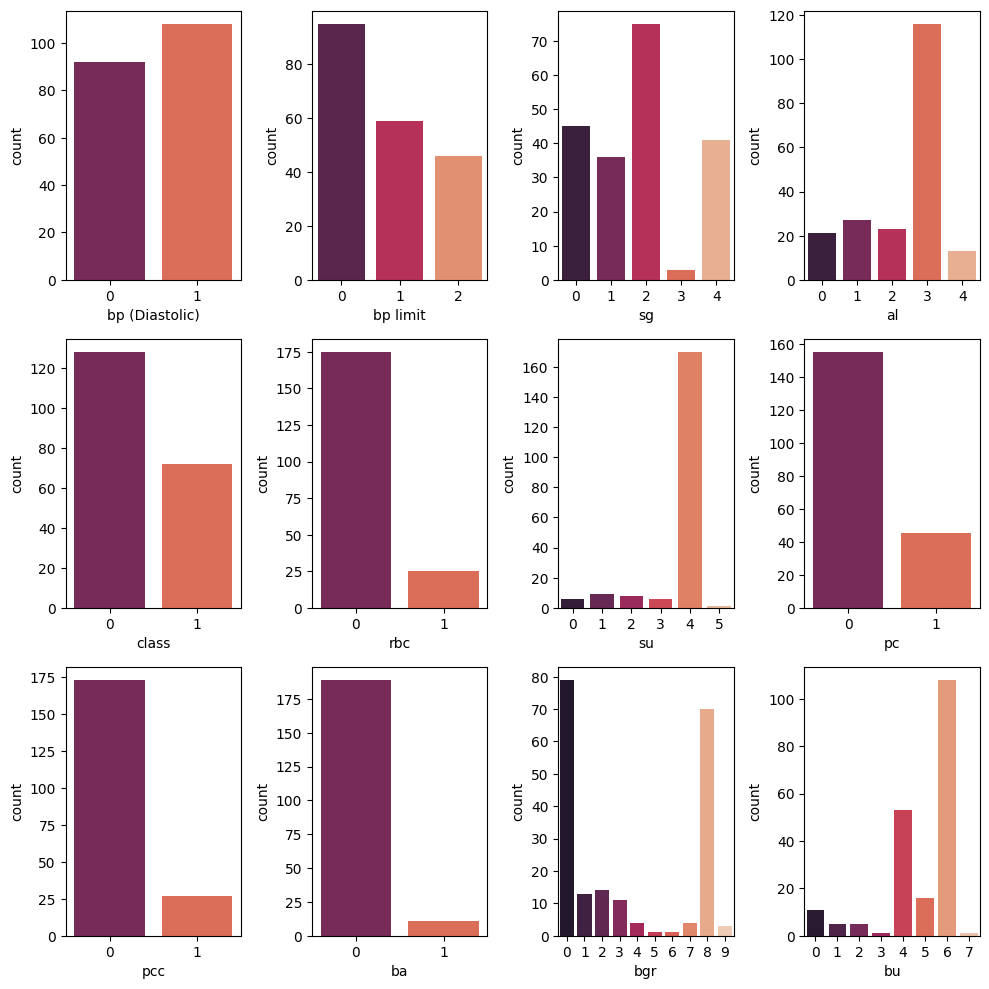

In [ ]:
plt.figure(figsize=(10, 10))
plotnumber = 1

for column in cat_cols:
    if plotnumber <= 12:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(data=df, x=column, palette='rocket')
        plt.xlabel(column)
    plotnumber += 1

plt.tight_layout()
plt.show()

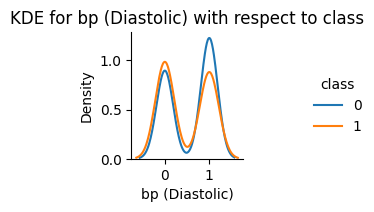

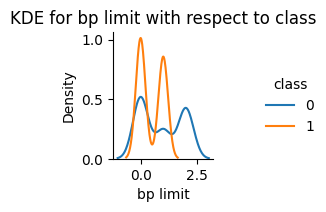

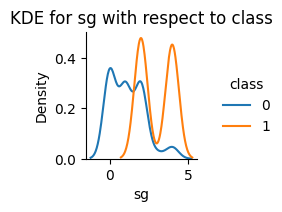

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)


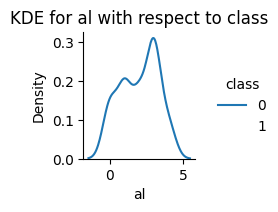

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)


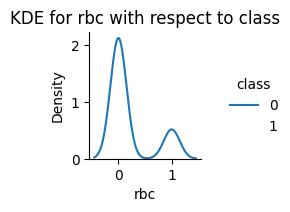

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)


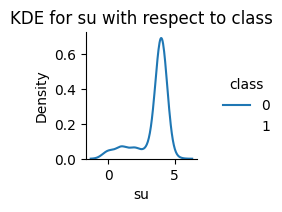

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)


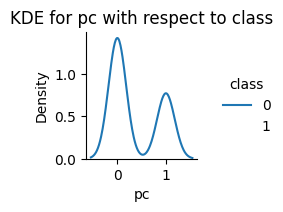

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)


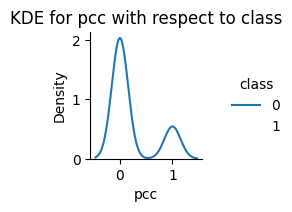

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)


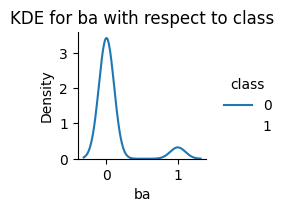

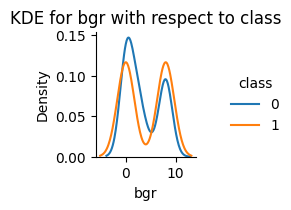

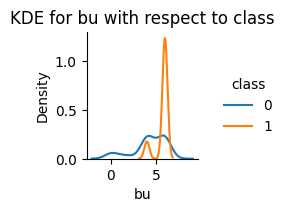

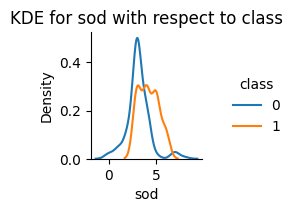

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)


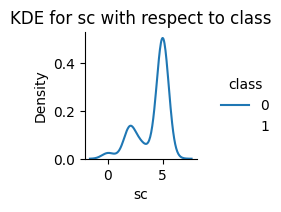

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)


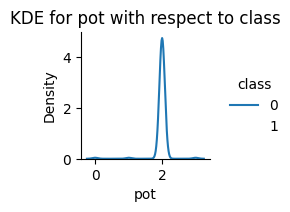

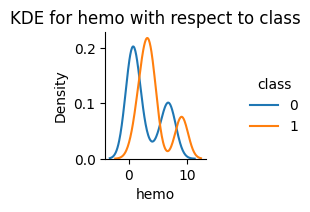

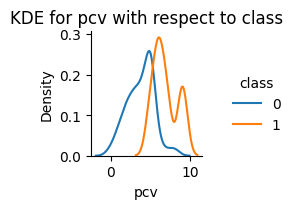

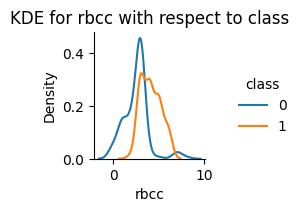

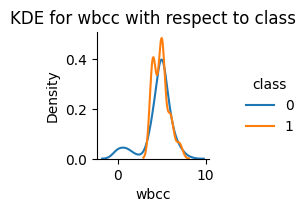

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)


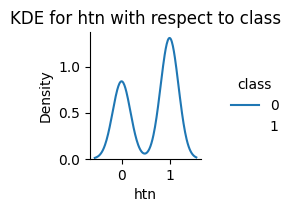

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)


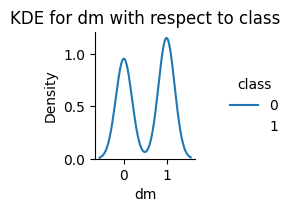

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)


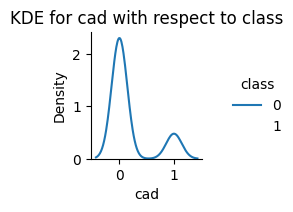

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)


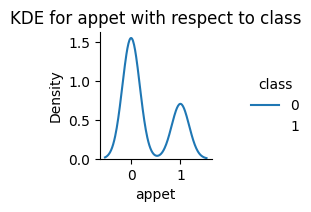

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)


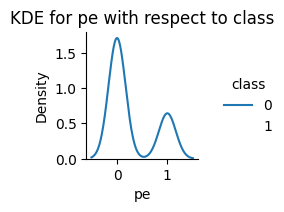

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)


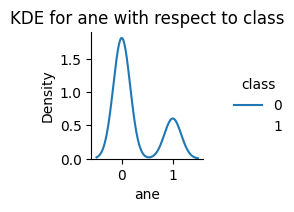

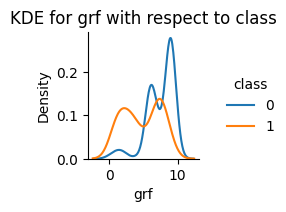

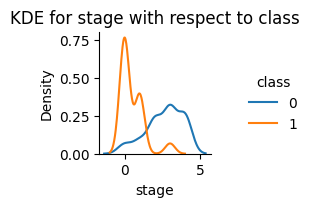

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)


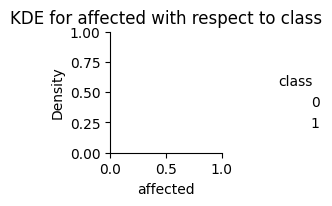

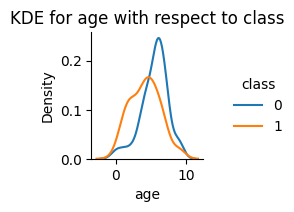

In [ ]:
def kde_all_attributes(df, target_attribute):
    for column in df.columns:
        if column != target_attribute:
            grid = sns.FacetGrid(df, hue=target_attribute, height=2, aspect=1)
            grid.map(sns.kdeplot, column)
            grid.add_legend()
            plt.title(f'KDE for {column} with respect to {target_attribute}')
            plt.show()
kde_all_attributes(df, 'class')

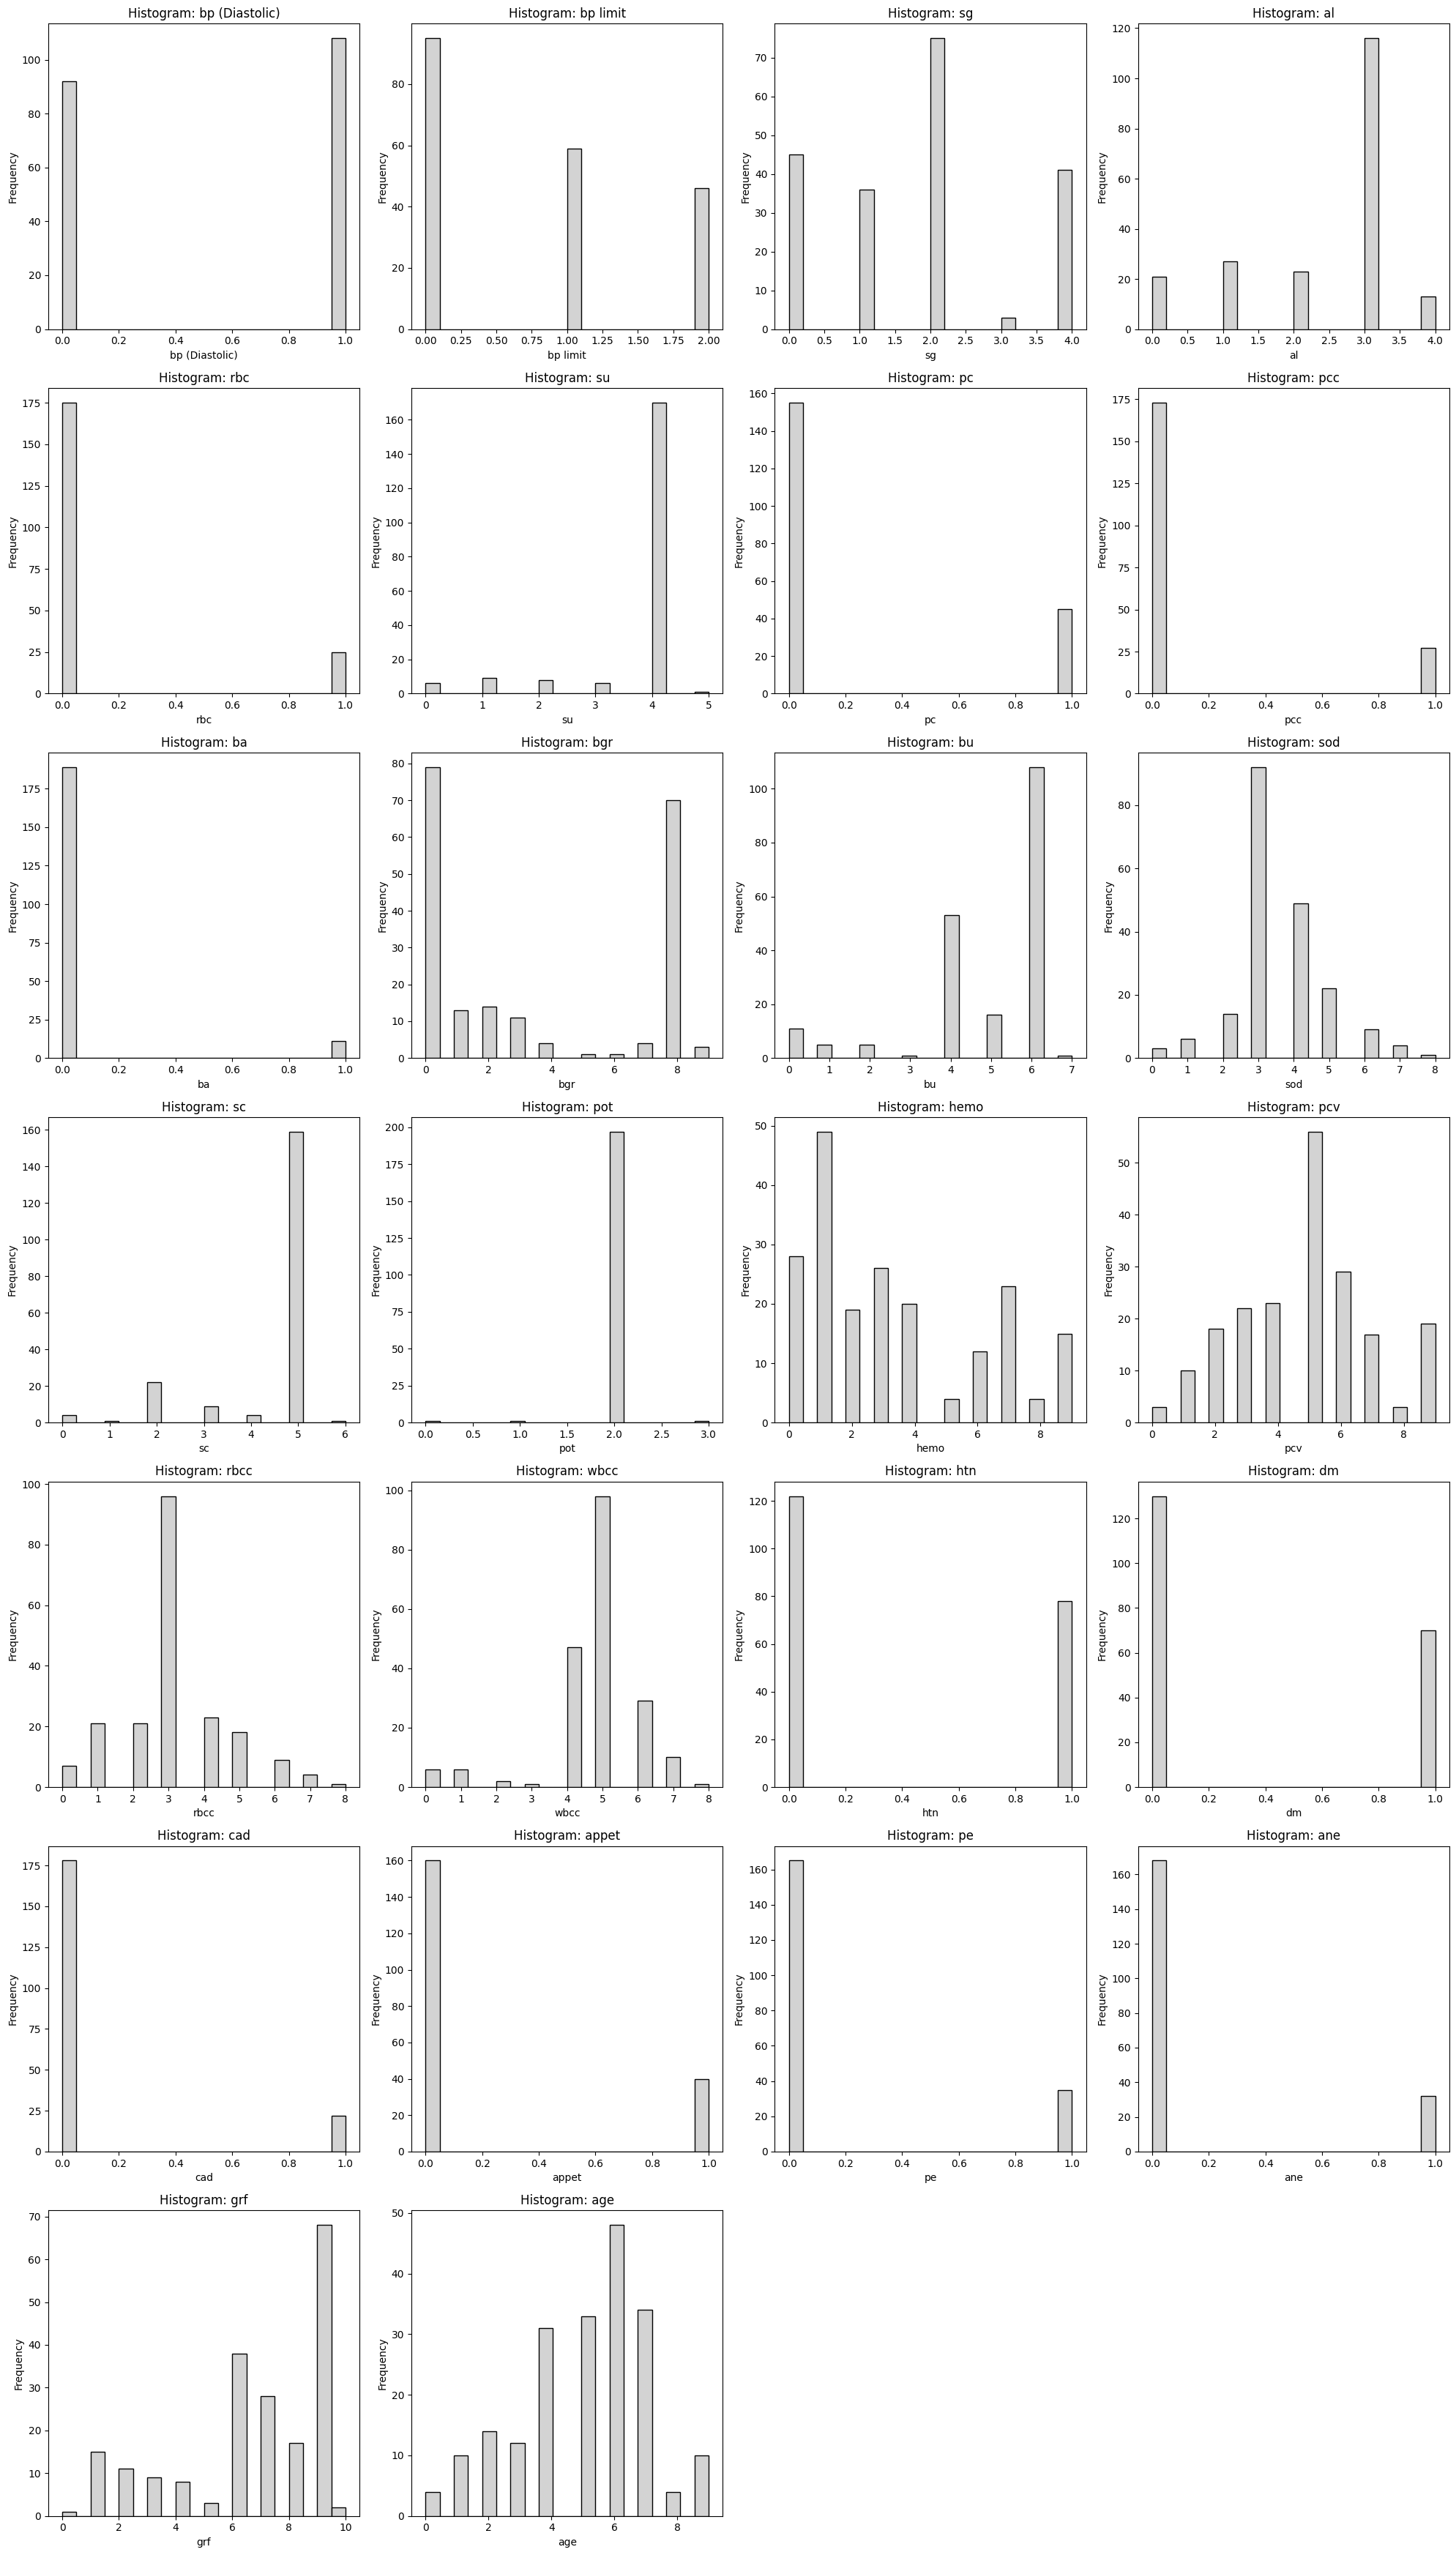

In [ ]:
import matplotlib.pyplot as plt
attributes = ['bp (Diastolic)', 'bp limit', 'sg', 'al', 'rbc', 'su', 'pc',
               'pcc', 'ba', 'bgr', 'bu', 'sod', 'sc', 'pot', 'hemo',
               'pcv', 'rbcc', 'wbcc', 'htn', 'dm', 'cad', 'appet',
               'pe', 'ane', 'grf', 'age']
plots_per_row = 4
num_attributes = len(attributes)
num_rows = num_attributes // plots_per_row
if num_attributes % plots_per_row != 0:
    num_rows += 1
fig, axes = plt.subplots(nrows=num_rows, ncols=plots_per_row, figsize=(20, num_rows*5))
axes = axes.flatten()
for i, attribute in enumerate(attributes):
    if i >= num_attributes:
        break
    axes[i].hist(df[attribute], bins=20, color='lightgrey', edgecolor='black')
    axes[i].set_xlabel(attribute)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Histogram: {attribute}')
for i in range(num_attributes, num_rows*plots_per_row):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()



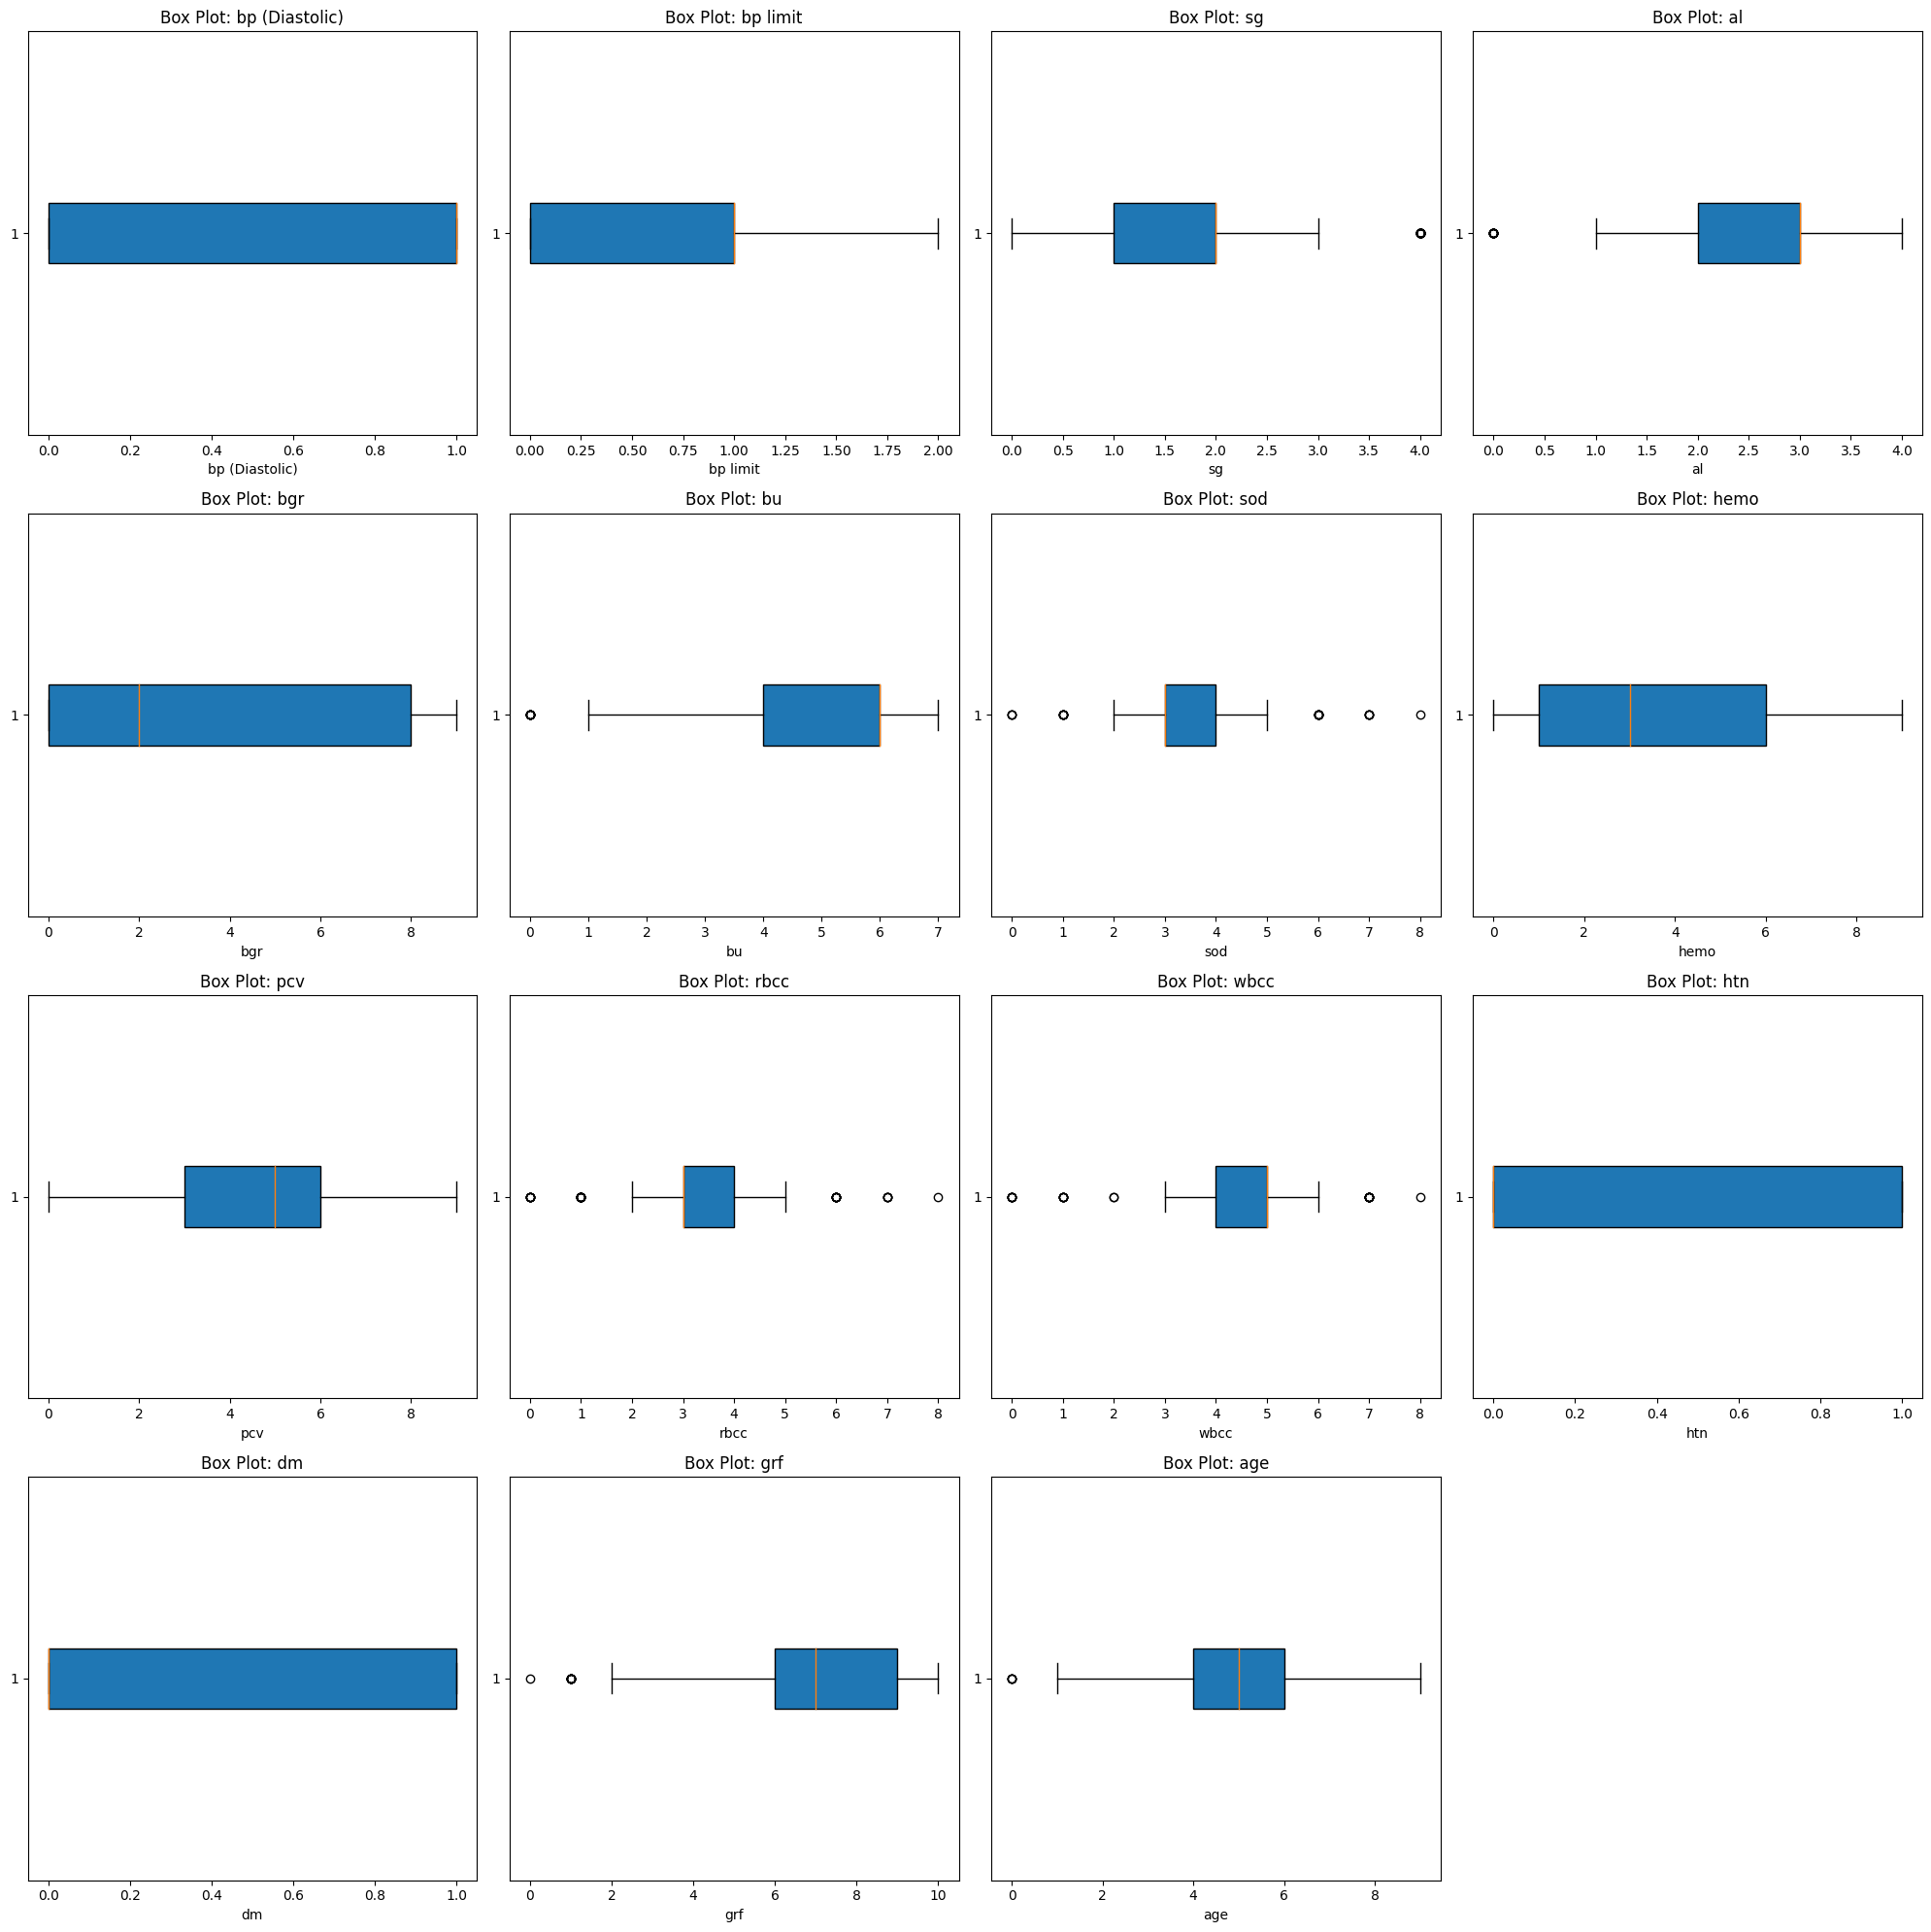

In [ ]:
import matplotlib.pyplot as plt
attributes = ['bp (Diastolic)', 'bp limit', 'sg', 'al','bgr', 'bu', 'sod', 'hemo','pcv', 'rbcc', 'wbcc', 'htn', 'dm','grf', 'age']
plots_per_row = 4
num_attributes = len(attributes)
num_rows = num_attributes // plots_per_row
if num_attributes % plots_per_row != 0:
    num_rows += 1
fig, axes = plt.subplots(nrows=num_rows, ncols=plots_per_row, figsize=(20, num_rows*5))
axes = axes.flatten()
for i, attribute in enumerate(attributes):
    if i >= num_attributes:
        break
    axes[i].boxplot(df[attribute], vert=False, patch_artist=True)
    axes[i].set_xlabel(attribute)
    axes[i].set_title(f'Box Plot: {attribute}')
for i in range(num_attributes, num_rows*plots_per_row):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


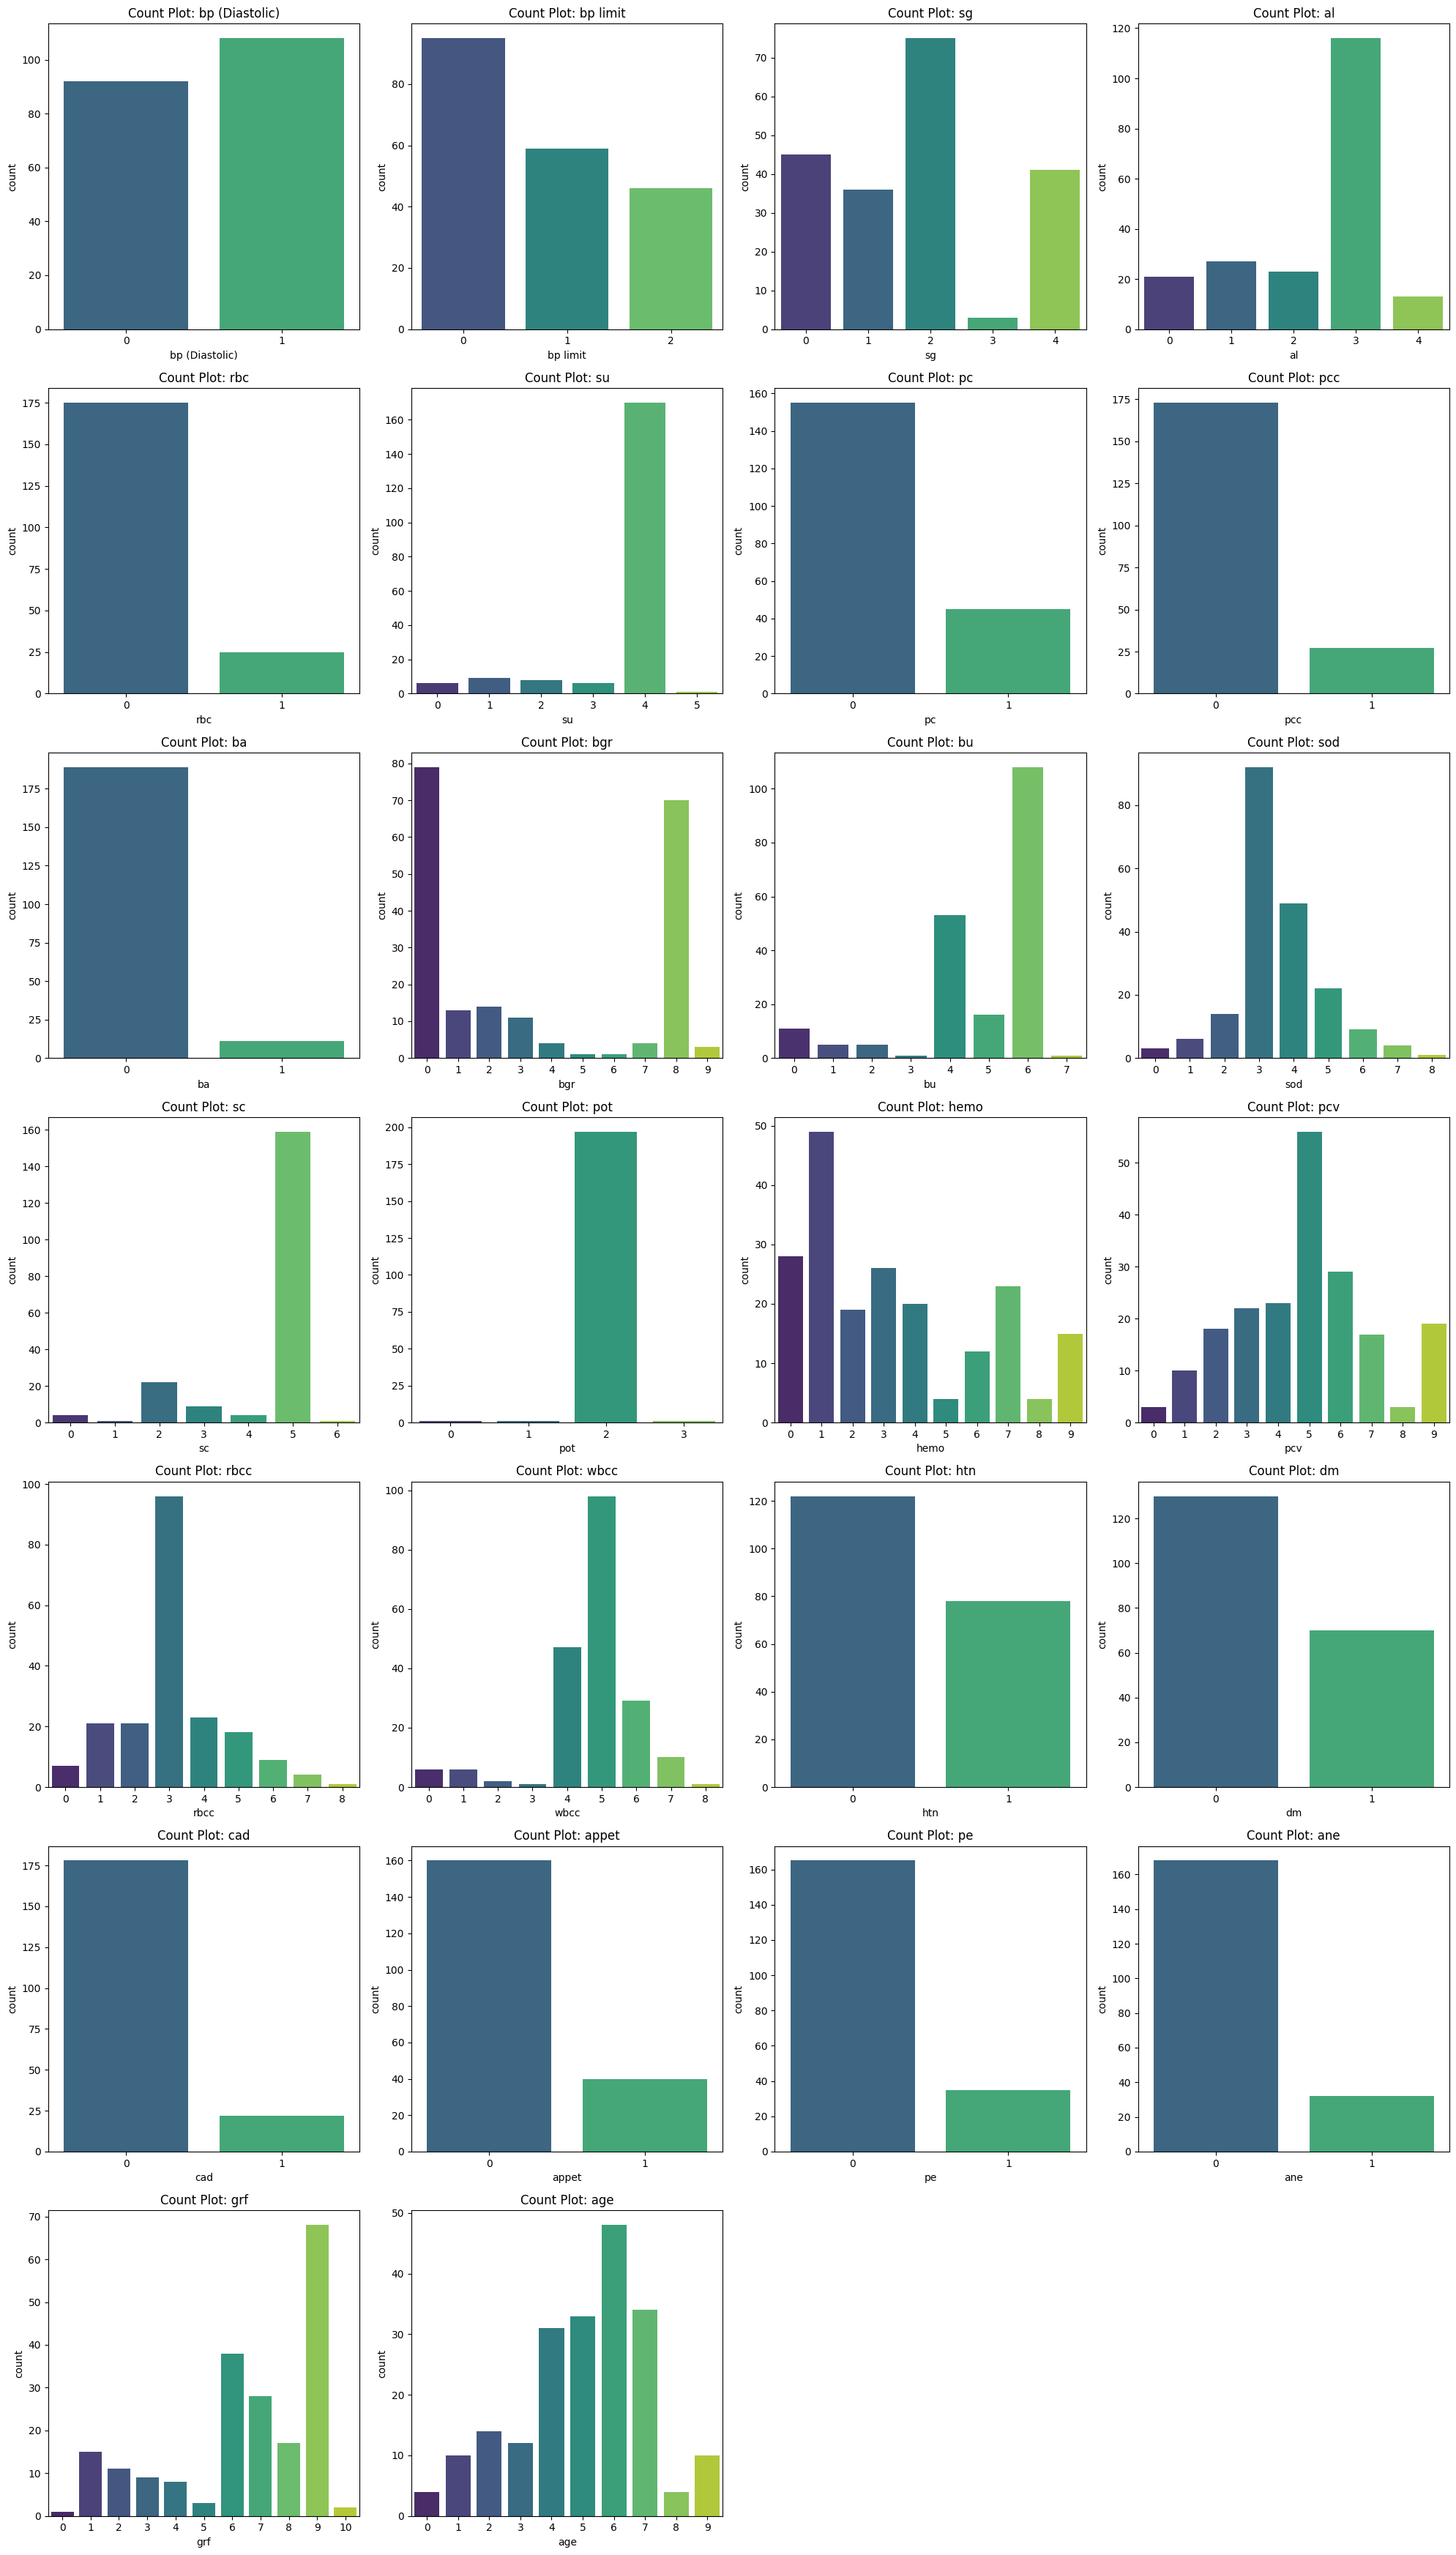

In [ ]:
attributes = ['bp (Diastolic)', 'bp limit', 'sg', 'al', 'rbc', 'su', 'pc',
               'pcc', 'ba', 'bgr', 'bu', 'sod', 'sc', 'pot', 'hemo',
               'pcv', 'rbcc', 'wbcc', 'htn', 'dm', 'cad', 'appet',
               'pe', 'ane', 'grf', 'age']
plots_per_row = 4
num_attributes = len(attributes)
num_rows = num_attributes // plots_per_row
if num_attributes % plots_per_row != 0:
    num_rows += 1
fig, axes = plt.subplots(nrows=num_rows, ncols=plots_per_row, figsize=(20, num_rows*5))
axes = axes.flatten()
for i, attribute in enumerate(attributes):
    if i >= num_attributes:
        break
    sns.countplot(data=df, x=attribute, palette='viridis', ax=axes[i])
    axes[i].set_xlabel(attribute)
    axes[i].set_title(f'Count Plot: {attribute}')
for i in range(num_attributes, num_rows*plots_per_row):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


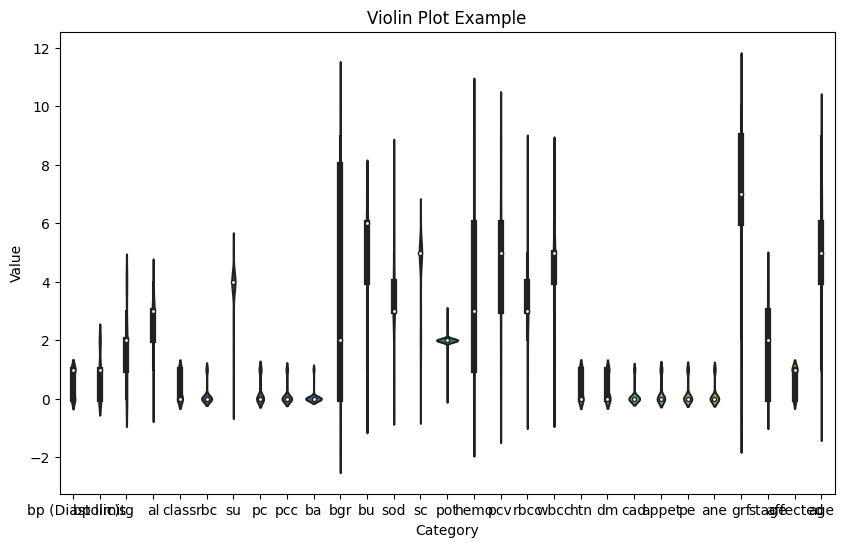

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
a = 'Category'
b = 'Value'

plt.figure(figsize=(10, 6))
sns.violinplot(a=a, b=b, data=df, palette='viridis')
plt.xlabel('Category')
plt.ylabel('Value')
plt.title('Violin Plot Example')
plt.show()


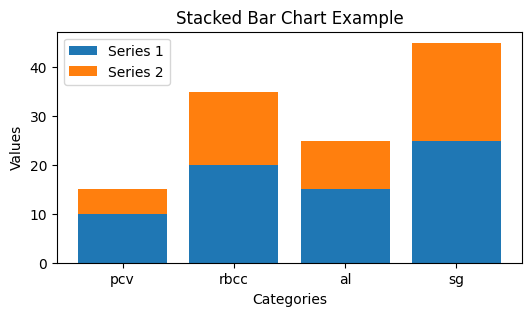

In [ ]:
import matplotlib.pyplot as plt
categories = ['pcv','rbcc','al','sg']
values1 = [10, 20, 15, 25]
values2 = [5, 15, 10, 20]

fig, ax = plt.subplots(figsize=(6,3))
ax.bar(categories, values1, label='Series 1')
ax.bar(categories, values2, bottom=values1, label='Series 2')
ax.set_xlabel('Categories')
ax.set_ylabel('Values')
ax.set_title('Stacked Bar Chart Example')
ax.legend()
plt.show()


In [ ]:
df.columns

Index(['bp (Diastolic)', 'bp limit', 'sg', 'al', 'class', 'rbc', 'su', 'pc',
       'pcc', 'ba', 'bgr', 'bu', 'sod', 'sc', 'pot', 'hemo', 'pcv', 'rbcc',
       'wbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'grf', 'stage',
       'affected', 'age'],
      dtype='object')

In [ ]:
df.nunique()

bp (Diastolic)     2
bp limit           3
sg                 5
al                 5
class              2
rbc                2
su                 6
pc                 2
pcc                2
ba                 2
bgr               10
bu                 8
sod                9
sc                 7
pot                4
hemo              10
pcv               10
rbcc               9
wbcc               9
htn                2
dm                 2
cad                2
appet              2
pe                 2
ane                2
grf               11
stage              5
affected           2
age               10
dtype: int64

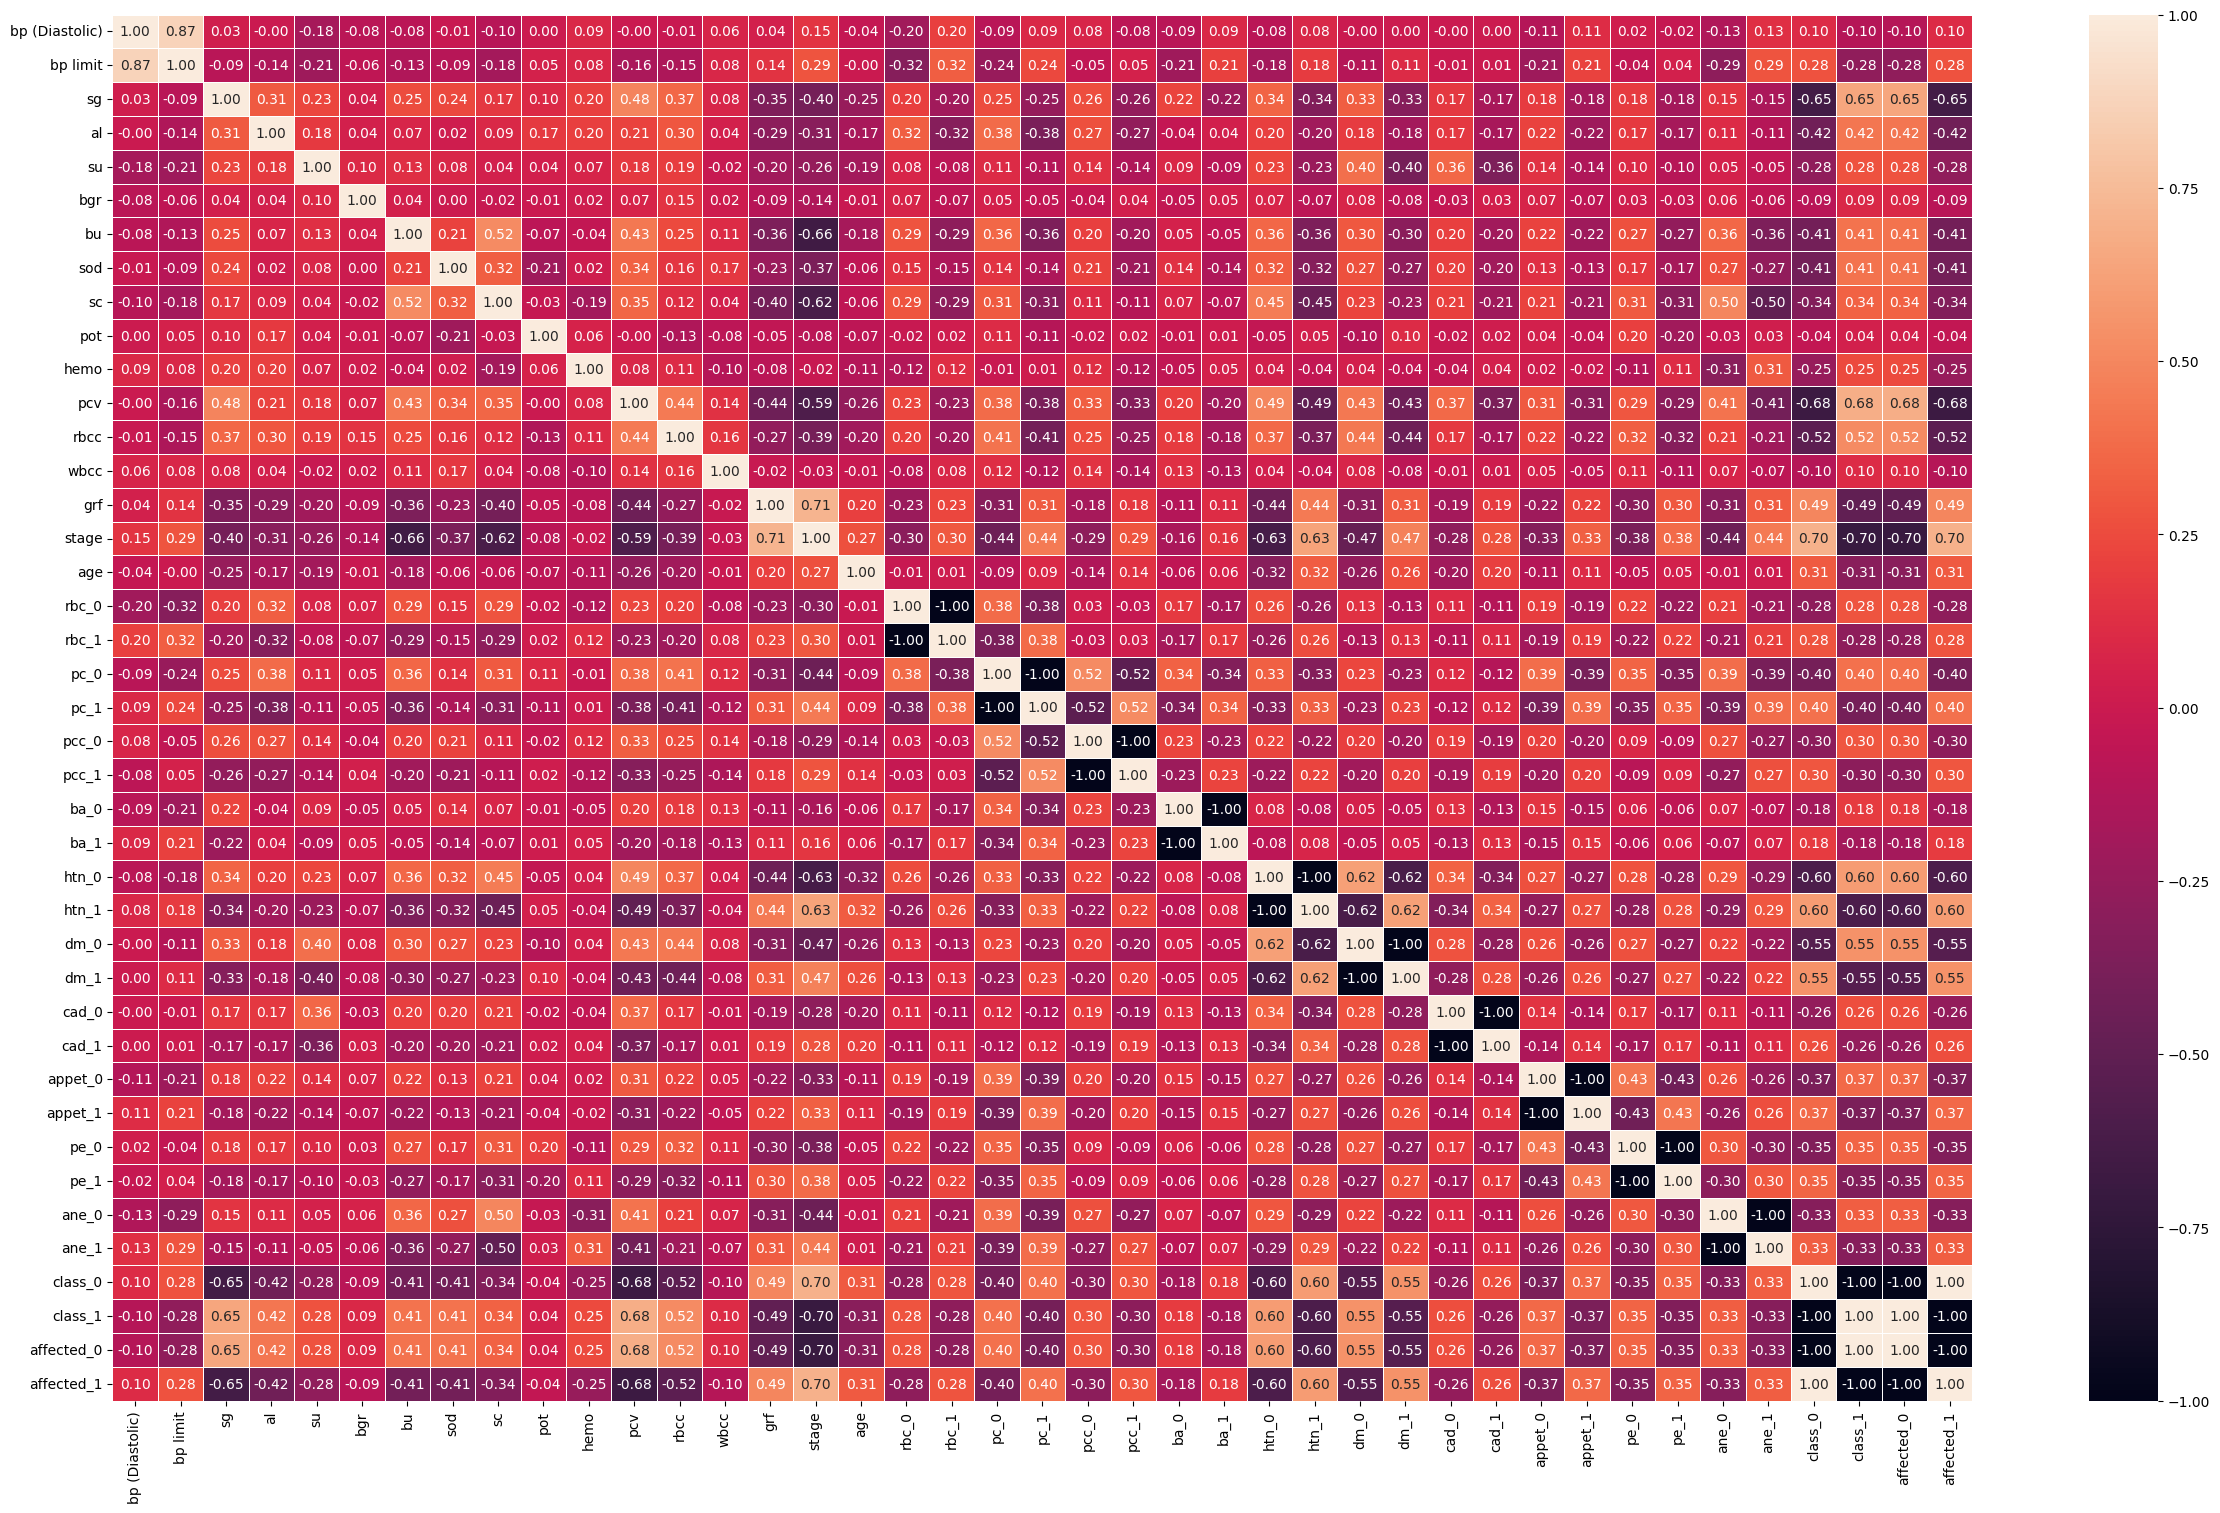

In [ ]:
df_encoded = pd.get_dummies(df, columns=['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'class', 'affected'])
corr_matrix = df_encoded.corr()
plt.figure(figsize=(30, 18))
sns.heatmap(corr_matrix, annot=True,fmt=".2f", linewidths=0.4)
plt.show()

Variance explained by Component 1: 0.2481
Variance explained by Component 2: 0.0745
Variance explained by Component 3: 0.0612
Variance explained by Component 4: 0.0577
Variance explained by Component 5: 0.0493
Variance explained by Component 6: 0.0448
Variance explained by Component 7: 0.0438
Variance explained by Component 8: 0.0375
Variance explained by Component 9: 0.0358
Variance explained by Component 10: 0.0343
Variance explained by Component 11: 0.0332
Variance explained by Component 12: 0.0317
Variance explained by Component 13: 0.0283
Variance explained by Component 14: 0.0282
Variance explained by Component 15: 0.0255
Variance explained by Component 16: 0.0239
Variance explained by Component 17: 0.0234
Variance explained by Component 18: 0.0215
Variance explained by Component 19: 0.0171
Variance explained by Component 20: 0.0166
Variance explained by Component 21: 0.0149
Variance explained by Component 22: 0.0127
Variance explained by Component 23: 0.0114
Variance explained b

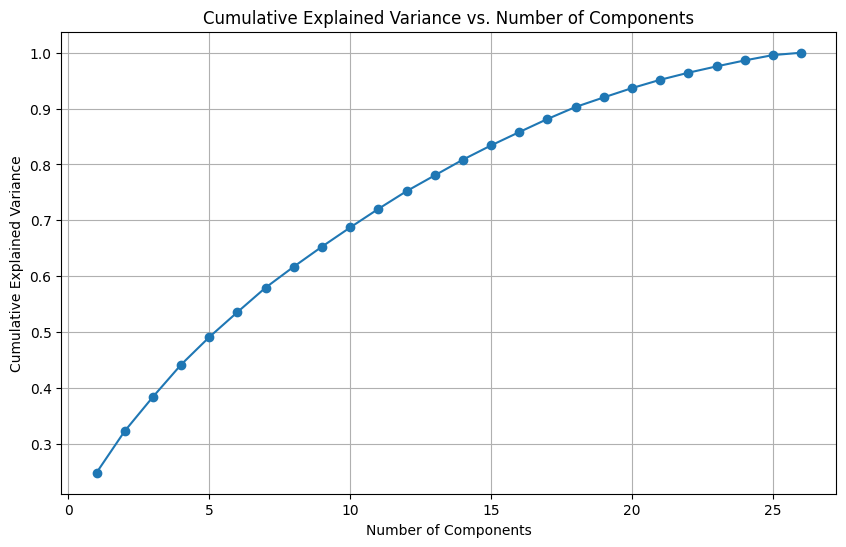

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X = df[['bp (Diastolic)', 'sg', 'al', 'rbc', 'su', 'pc',
       'pcc', 'ba', 'bgr', 'bu', 'sod', 'sc', 'pot', 'hemo', 'pcv', 'rbcc',
       'wbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'grf', 'stage', 'age']]
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_standardized)

explained_variance = pca.explained_variance_ratio_

cumulative_explained_variance = explained_variance.cumsum()

for i, ev in enumerate(explained_variance):
    print(f"Variance explained by Component {i+1}: {ev:.4f}")

print("\nCumulative Explained Variance:")
for i, cev in enumerate(cumulative_explained_variance):
    print(f"Components {i+1}: {cev:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()


In [ ]:
X.columns

Index(['bp (Diastolic)', 'sg', 'al', 'rbc', 'su', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sod', 'sc', 'pot', 'hemo', 'pcv', 'rbcc', 'wbcc', 'htn', 'dm',
       'cad', 'appet', 'pe', 'ane', 'grf', 'stage', 'age'],
      dtype='object')

In [ ]:
X.shape

(200, 26)

In [ ]:
print(X_standardized[0])

[-1.08347268  0.14979174 -2.10542699 -0.37796447  0.36927447 -0.53881591
 -0.39505615 -0.24124895  1.21456075  0.7004012   0.37401846  0.458228
  0.05783149 -0.82255804 -0.39837021 -0.07839699  0.20764924 -0.79959006
 -0.73379939 -0.35156152 -0.5        -0.46056619 -0.43643578  1.32195725
 -1.26545253  1.43326822]


In [ ]:
X_standardized.shape

(200, 26)

In [ ]:
df.columns

Index(['bp (Diastolic)', 'bp limit', 'sg', 'al', 'class', 'rbc', 'su', 'pc',
       'pcc', 'ba', 'bgr', 'bu', 'sod', 'sc', 'pot', 'hemo', 'pcv', 'rbcc',
       'wbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'grf', 'stage',
       'affected', 'age'],
      dtype='object')

In [ ]:
df = df.drop(['affected'], axis=1)

Splitting Train and Test Data

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['class'])
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (140, 27)
X_test shape: (60, 27)
y_train shape: (140,)
y_test shape: (60,)


In [ ]:
from scipy import stats
selected_columns = ['pcv','rbcc','al','grf','hemo','age','sg']
z_scores = np.abs(stats.zscore(X_train[selected_columns]))
threshold = 3
outlier_indices = np.where(z_scores > threshold)[0]
X_train = X_train.drop(X_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc_acc=accuracy_score(y_test,dtc.predict(X_test))
train_accuracy_dtc = accuracy_score(y_train, dtc.predict(X_train))
print(f"Training Accuracy of Decision Tree Classifier is {train_accuracy_dtc * 100:.2f}%")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc:.2f}% \n")


Training Accuracy of Decision Tree Classifier is 100.00%
Test Accuracy of Decision Tree Classifier is 0.97% 



In [ ]:
importances = dtc.feature_importances_
feature_names = X_train.columns
indices = importances.argsort()[::-1]
plt.figure(figsize=(6, 3))
plt.title("Top 5 Feature Importance")
plt.bar(range(6), importances[indices[:6]], align="center")
plt.xticks(range(6), [feature_names[i] for i in indices[:6]], rotation='vertical')
plt.xlim([-1, 6])
plt.show()

NameError: name 'log_reg' is not defined

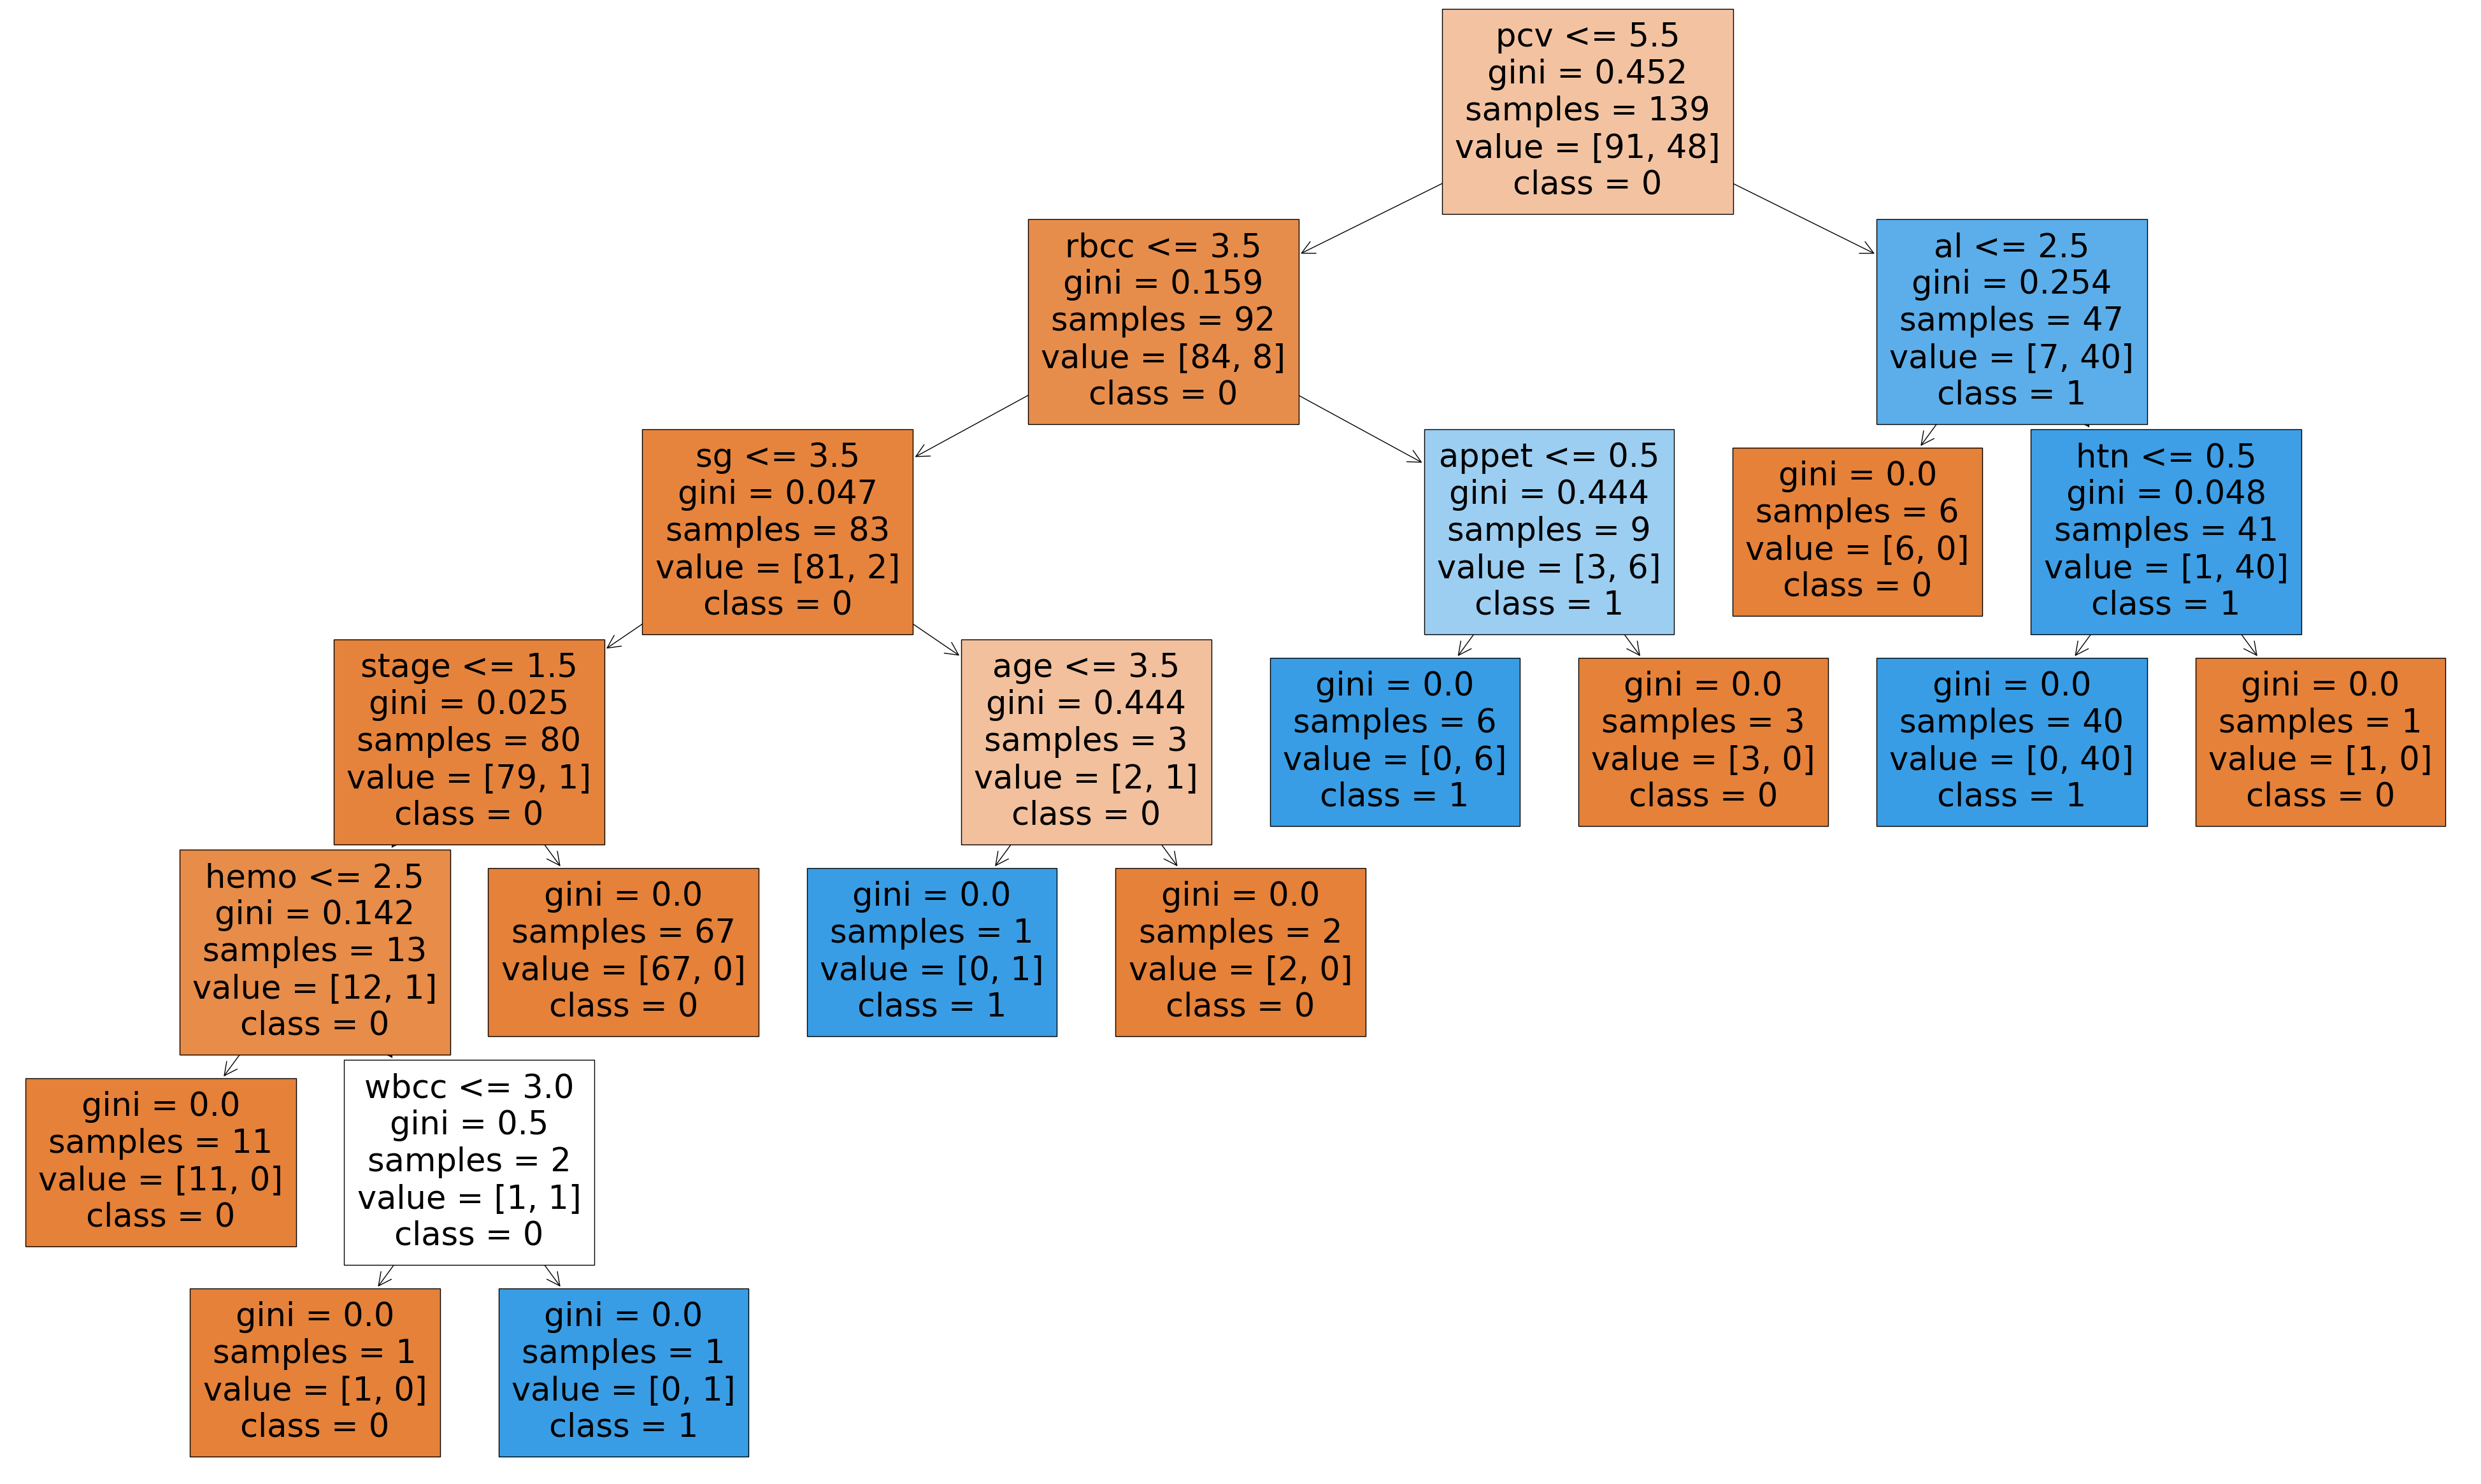

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(50, 30))
plot_tree(dtc, filled=True, feature_names=X_train.columns, class_names=['0', '1'])
plt.savefig('decision_tree.png', format='png')
plt.show()

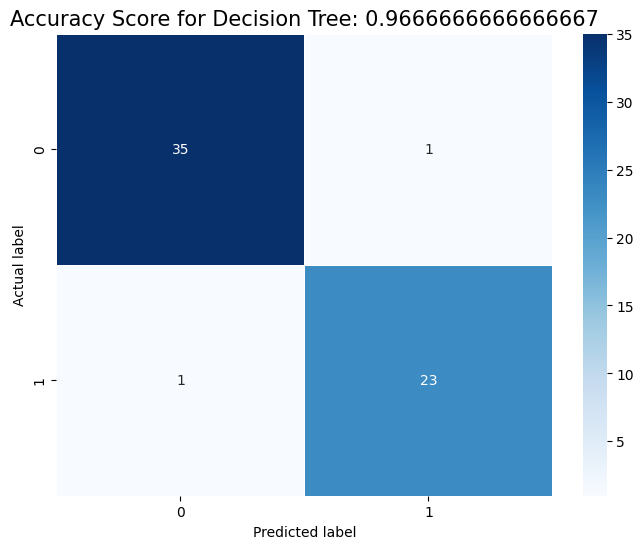

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = dtc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(data=cm, linewidths=.5, annot=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Decision Tree: {0}'.format(dtc.score(X_test, y_test))
plt.title(all_sample_title, size=15)
plt.show()


In [ ]:
df.columns


Index(['bp (Diastolic)', 'bp limit', 'sg', 'al', 'class', 'rbc', 'su', 'pc',
       'pcc', 'ba', 'bgr', 'bu', 'sod', 'sc', 'pot', 'hemo', 'pcv', 'rbcc',
       'wbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'grf', 'stage',
       'age'],
      dtype='object')

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
from tabulate import tabulate
accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
f1 = f1_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
jaccard = jaccard_score(y_test, y_pred, average='micro')
logloss = log_loss(y_test, y_pred)
data = {'Metric': ['Accuracy', 'F1 Score', 'Precision', 'Recall', 'Jaccard Score', 'Log Loss'],
        'Value': [accuracy, f1, precision, recall, jaccard, logloss]}
df_dtree = pd.DataFrame(data)
print(tabulate(df_dtree, headers='keys', tablefmt='grid'))


+----+---------------+-----------+
|    | Metric        |     Value |
+====+===============+===========+
|  0 | Accuracy      | 96.67     |
+----+---------------+-----------+
|  1 | F1 Score      |  0.966667 |
+----+---------------+-----------+
|  2 | Precision     |  0.966667 |
+----+---------------+-----------+
|  3 | Recall        |  0.966667 |
+----+---------------+-----------+
|  4 | Jaccard Score |  0.935484 |
+----+---------------+-----------+
|  5 | Log Loss      |  1.20146  |
+----+---------------+-----------+


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_acc = accuracy_score(y_test, rfc.predict(X_test))
rfc_acc_percentage = rfc_acc * 100
train_accuracy_rfc = accuracy_score(y_train, rfc.predict(X_train))
print(f"Training Accuracy of Random Forest Classifier is {train_accuracy_rfc * 100:.2f}%")
print(f"Test Accuracy of Random Forest Classifier is {rfc_acc_percentage:.2f}% \n")

Training Accuracy of Random Forest Classifier is 100.00%
Test Accuracy of Random Forest Classifier is 100.00% 



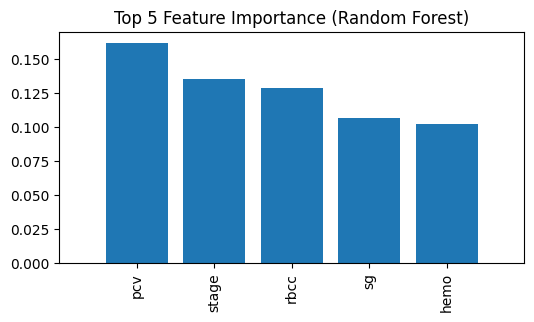

In [ ]:
importances = rfc.feature_importances_
feature_names = X_train.columns
indices = importances.argsort()[::-1]
plt.figure(figsize=(6, 3))
plt.title("Top 5 Feature Importance (Random Forest)")
plt.bar(range(5), importances[indices[:5]], align="center")
plt.xticks(range(5), [feature_names[i] for i in indices[:5]], rotation='vertical')
plt.xlim([-1, 5])
plt.show()

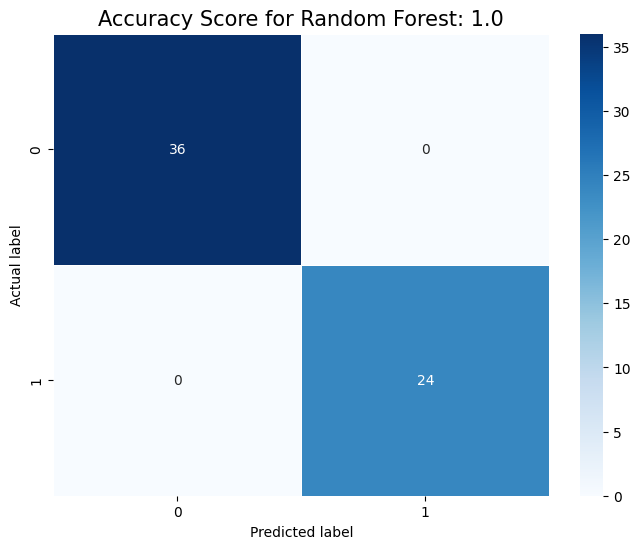

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred_rfc = rfc.predict(X_test)
cm_rfc = confusion_matrix(y_test, y_pred_rfc)
plt.figure(figsize=(8, 6))
sns.heatmap(data=cm_rfc, linewidths=.5, annot=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Random Forest: {0}'.format(rfc.score(X_test, y_test))
plt.title(all_sample_title, size=15)
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
from tabulate import tabulate
accuracy_rfc = round(accuracy_score(y_test, y_pred_rfc) * 100, 2)
f1_rfc = f1_score(y_test, y_pred_rfc, average='micro')
precision_rfc = precision_score(y_test, y_pred_rfc, average='micro')
recall_rfc = recall_score(y_test, y_pred_rfc, average='micro')
jaccard_rfc = jaccard_score(y_test, y_pred_rfc, average='micro')
logloss_rfc = log_loss(y_test, y_pred_rfc)
data_rfc = {'Metric': ['Accuracy', 'F1 Score', 'Precision', 'Recall', 'Jaccard Score', 'Log Loss'],
            'Value': [accuracy_rfc, f1_rfc, precision_rfc, recall_rfc, jaccard_rfc, logloss_rfc]}
df_rfc = pd.DataFrame(data_rfc)
print(tabulate(df_rfc, headers='keys', tablefmt='grid'))


+----+---------------+---------------+
|    | Metric        |         Value |
+====+===============+===============+
|  0 | Accuracy      | 100           |
+----+---------------+---------------+
|  1 | F1 Score      |   1           |
+----+---------------+---------------+
|  2 | Precision     |   1           |
+----+---------------+---------------+
|  3 | Recall        |   1           |
+----+---------------+---------------+
|  4 | Jaccard Score |   1           |
+----+---------------+---------------+
|  5 | Log Loss      |   2.22045e-16 |
+----+---------------+---------------+


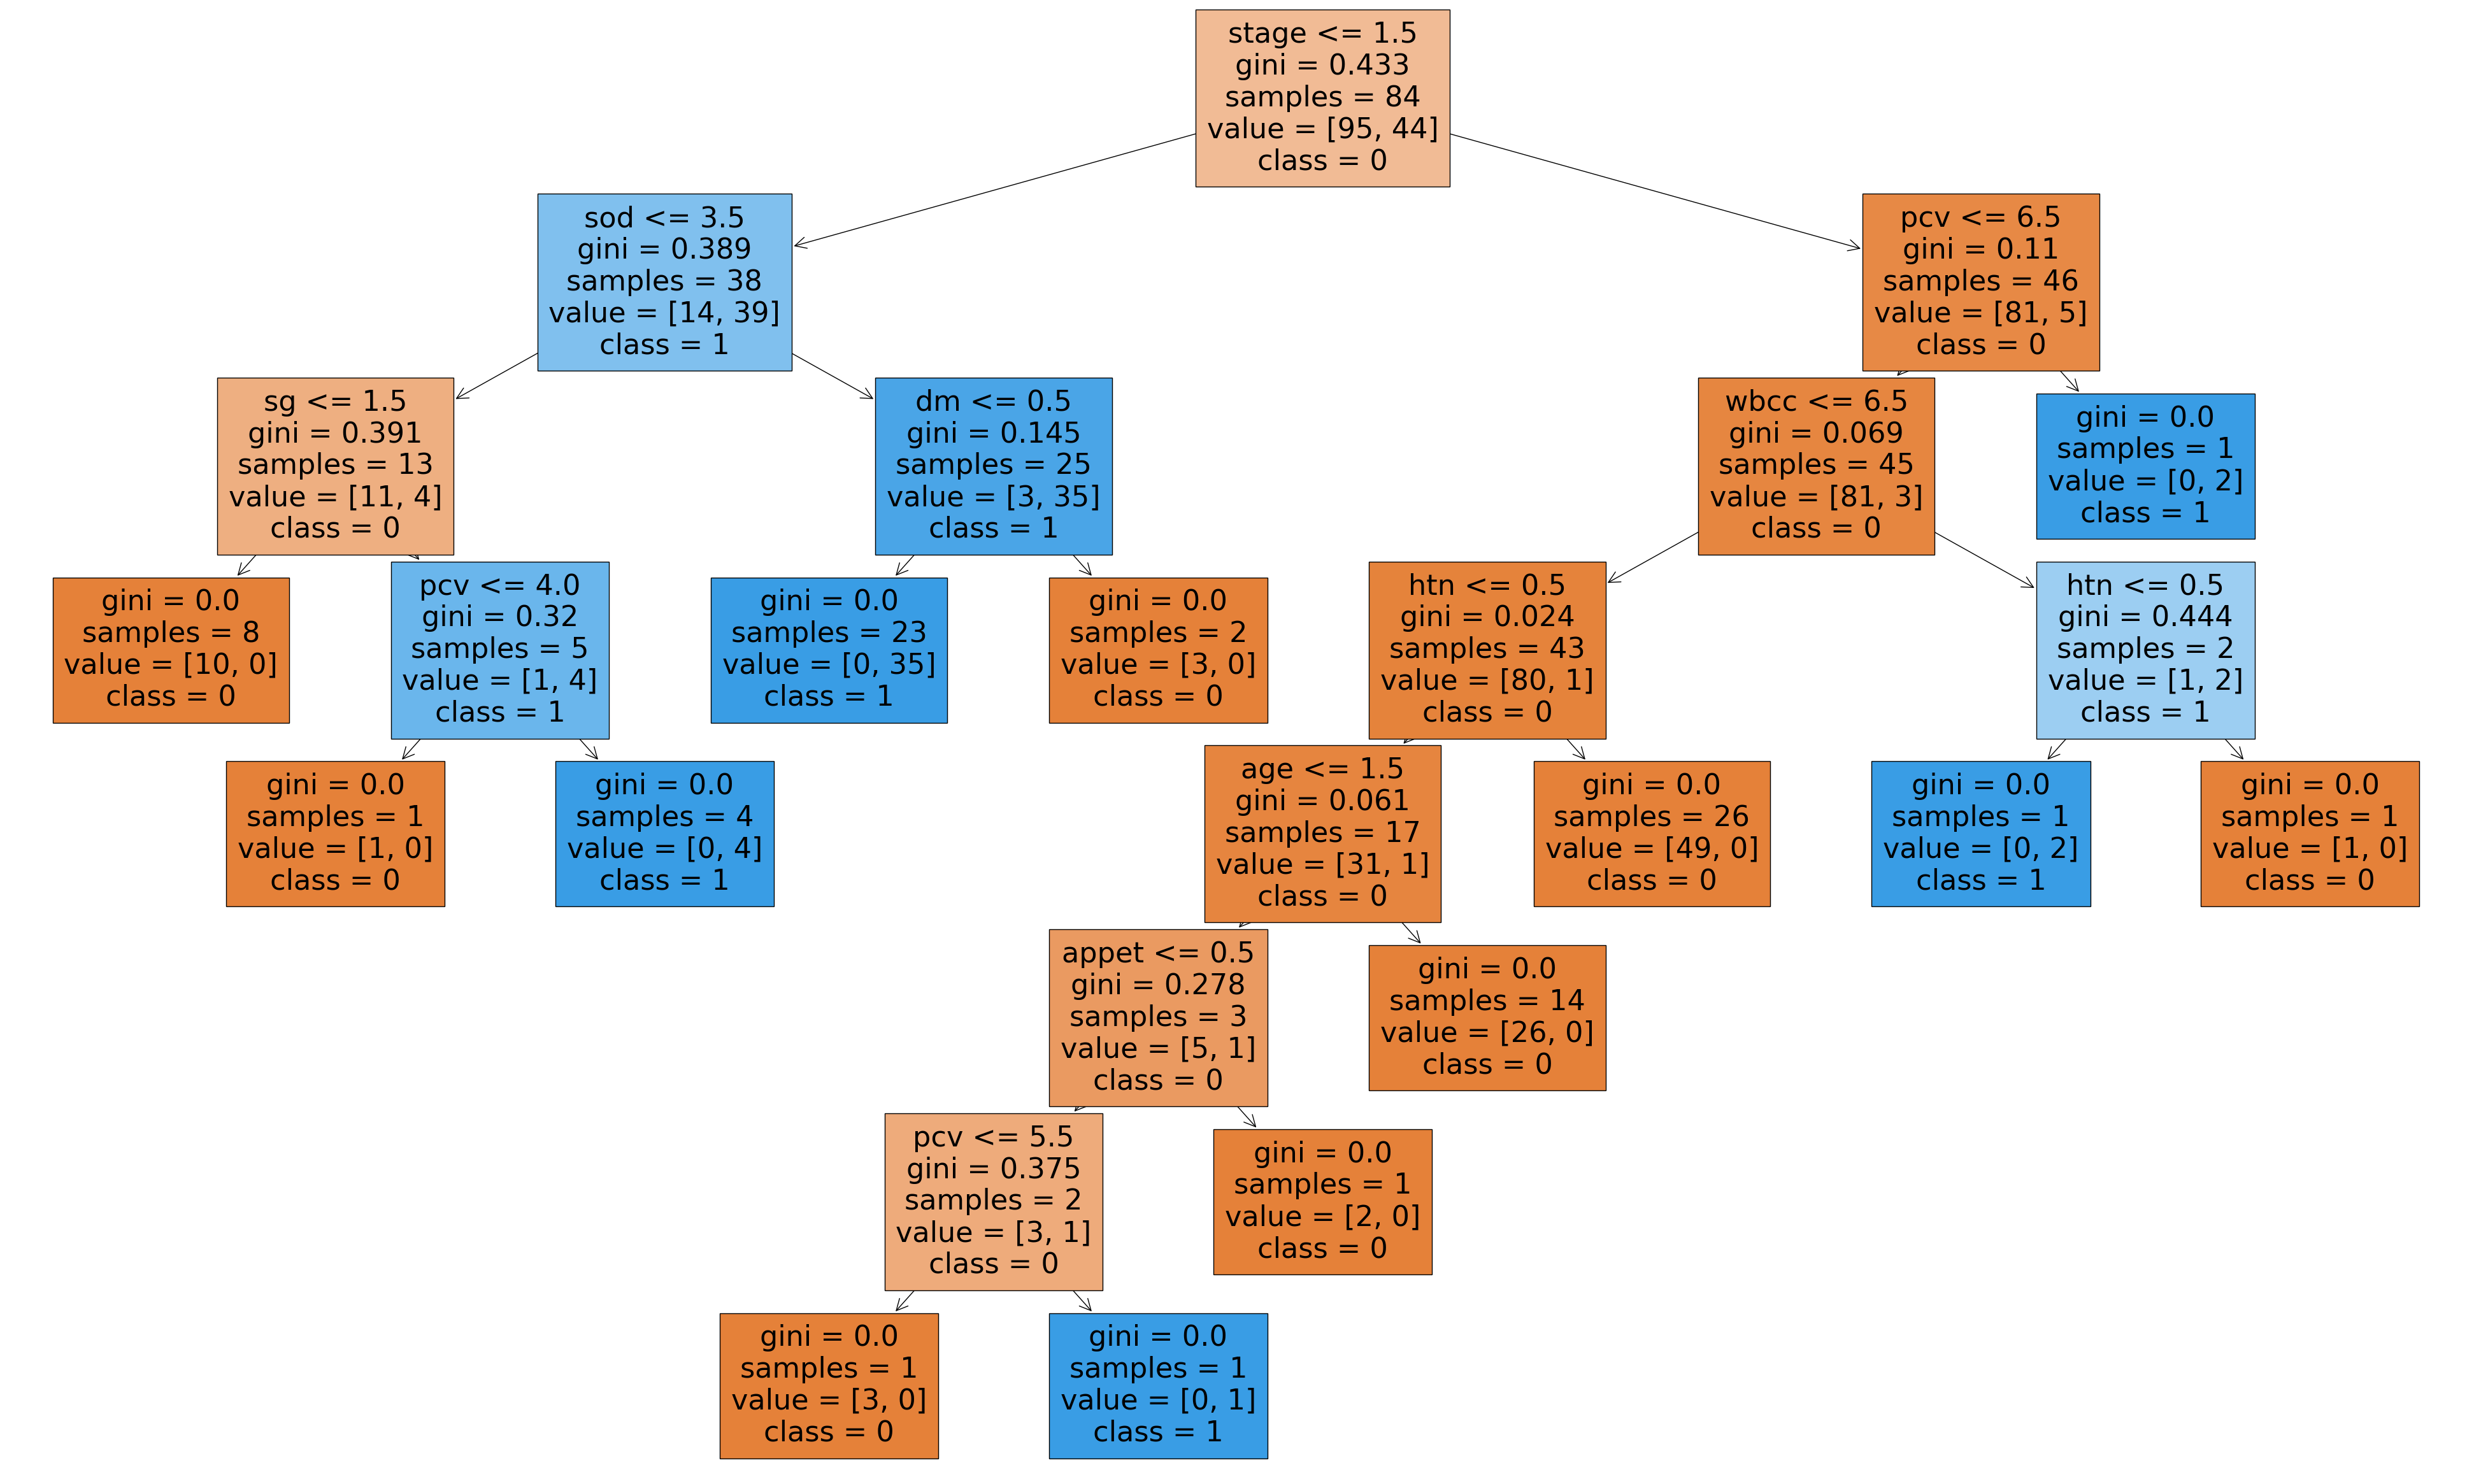

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(50, 30))
plot_tree(rfc.estimators_[0], filled=True, feature_names=X_train.columns, class_names=['0', '1'])
plt.savefig('random_forest_tree.png', format='png')
plt.show()

AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
adaboost = AdaBoostClassifier()
adaboost.fit(X_train, y_train)
adaboost_acc = accuracy_score(y_test, adaboost.predict(X_test))
adaboost_acc_percentage = adaboost_acc * 100
train_accuracy = accuracy_score(y_train, adaboost.predict(X_train))
print(f"Training Accuracy of AdaBoost is {train_accuracy * 100:.2f}%")
print(f"Test Accuracy of AdaBoost Classifier is {adaboost_acc_percentage:.2f}% \n")

Training Accuracy of AdaBoost is 100.00%
Test Accuracy of AdaBoost Classifier is 100.00% 



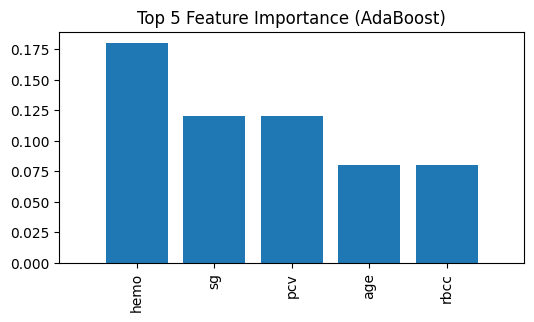

In [ ]:
importances = adaboost.feature_importances_
feature_names = X_train.columns
indices = importances.argsort()[::-1]
plt.figure(figsize=(6,3))
plt.title("Top 5 Feature Importance (AdaBoost)")
plt.bar(range(5), importances[indices[:5]], align="center")
plt.xticks(range(5), [feature_names[i] for i in indices[:5]], rotation='vertical')
plt.xlim([-1, 5])
plt.show()

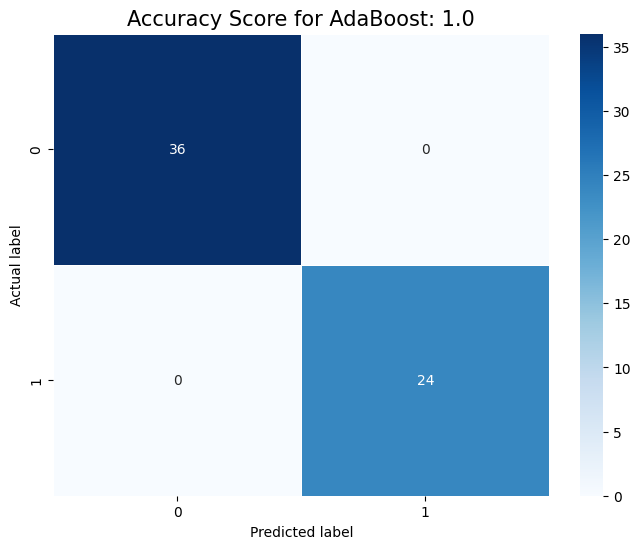

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred_adaboost = adaboost.predict(X_test)
cm_adaboost = confusion_matrix(y_test, y_pred_adaboost)
plt.figure(figsize=(8, 6))
sns.heatmap(data=cm_adaboost, linewidths=.5, annot=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for AdaBoost: {0}'.format(adaboost.score(X_test, y_test))
plt.title(all_sample_title, size=15)
plt.show()



In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
from tabulate import tabulate
accuracy_adaboost = round(accuracy_score(y_test, y_pred_adaboost) * 100, 2)
f1_adaboost = f1_score(y_test, y_pred_adaboost, average='micro')
precision_adaboost = precision_score(y_test, y_pred_adaboost, average='micro')
recall_adaboost = recall_score(y_test, y_pred_adaboost, average='micro')
jaccard_adaboost = jaccard_score(y_test, y_pred_adaboost, average='micro')
logloss_adaboost = log_loss(y_test, y_pred_adaboost)
data_adaboost = {'Metric': ['Accuracy', 'F1 Score', 'Precision', 'Recall', 'Jaccard Score', 'Log Loss'],
                 'Value': [accuracy_adaboost, f1_adaboost, precision_adaboost, recall_adaboost, jaccard_adaboost, logloss_adaboost]}
df_adaboost = pd.DataFrame(data_adaboost)
print(tabulate(df_adaboost, headers='keys', tablefmt='grid'))


+----+---------------+---------------+
|    | Metric        |         Value |
+====+===============+===============+
|  0 | Accuracy      | 100           |
+----+---------------+---------------+
|  1 | F1 Score      |   1           |
+----+---------------+---------------+
|  2 | Precision     |   1           |
+----+---------------+---------------+
|  3 | Recall        |   1           |
+----+---------------+---------------+
|  4 | Jaccard Score |   1           |
+----+---------------+---------------+
|  5 | Log Loss      |   2.22045e-16 |
+----+---------------+---------------+


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=50)
abc.fit(X_train, y_train)
num_trees = abc.n_estimators
print(f"The AdaBoostClassifier has {num_trees} trees.")


The AdaBoostClassifier has 50 trees.


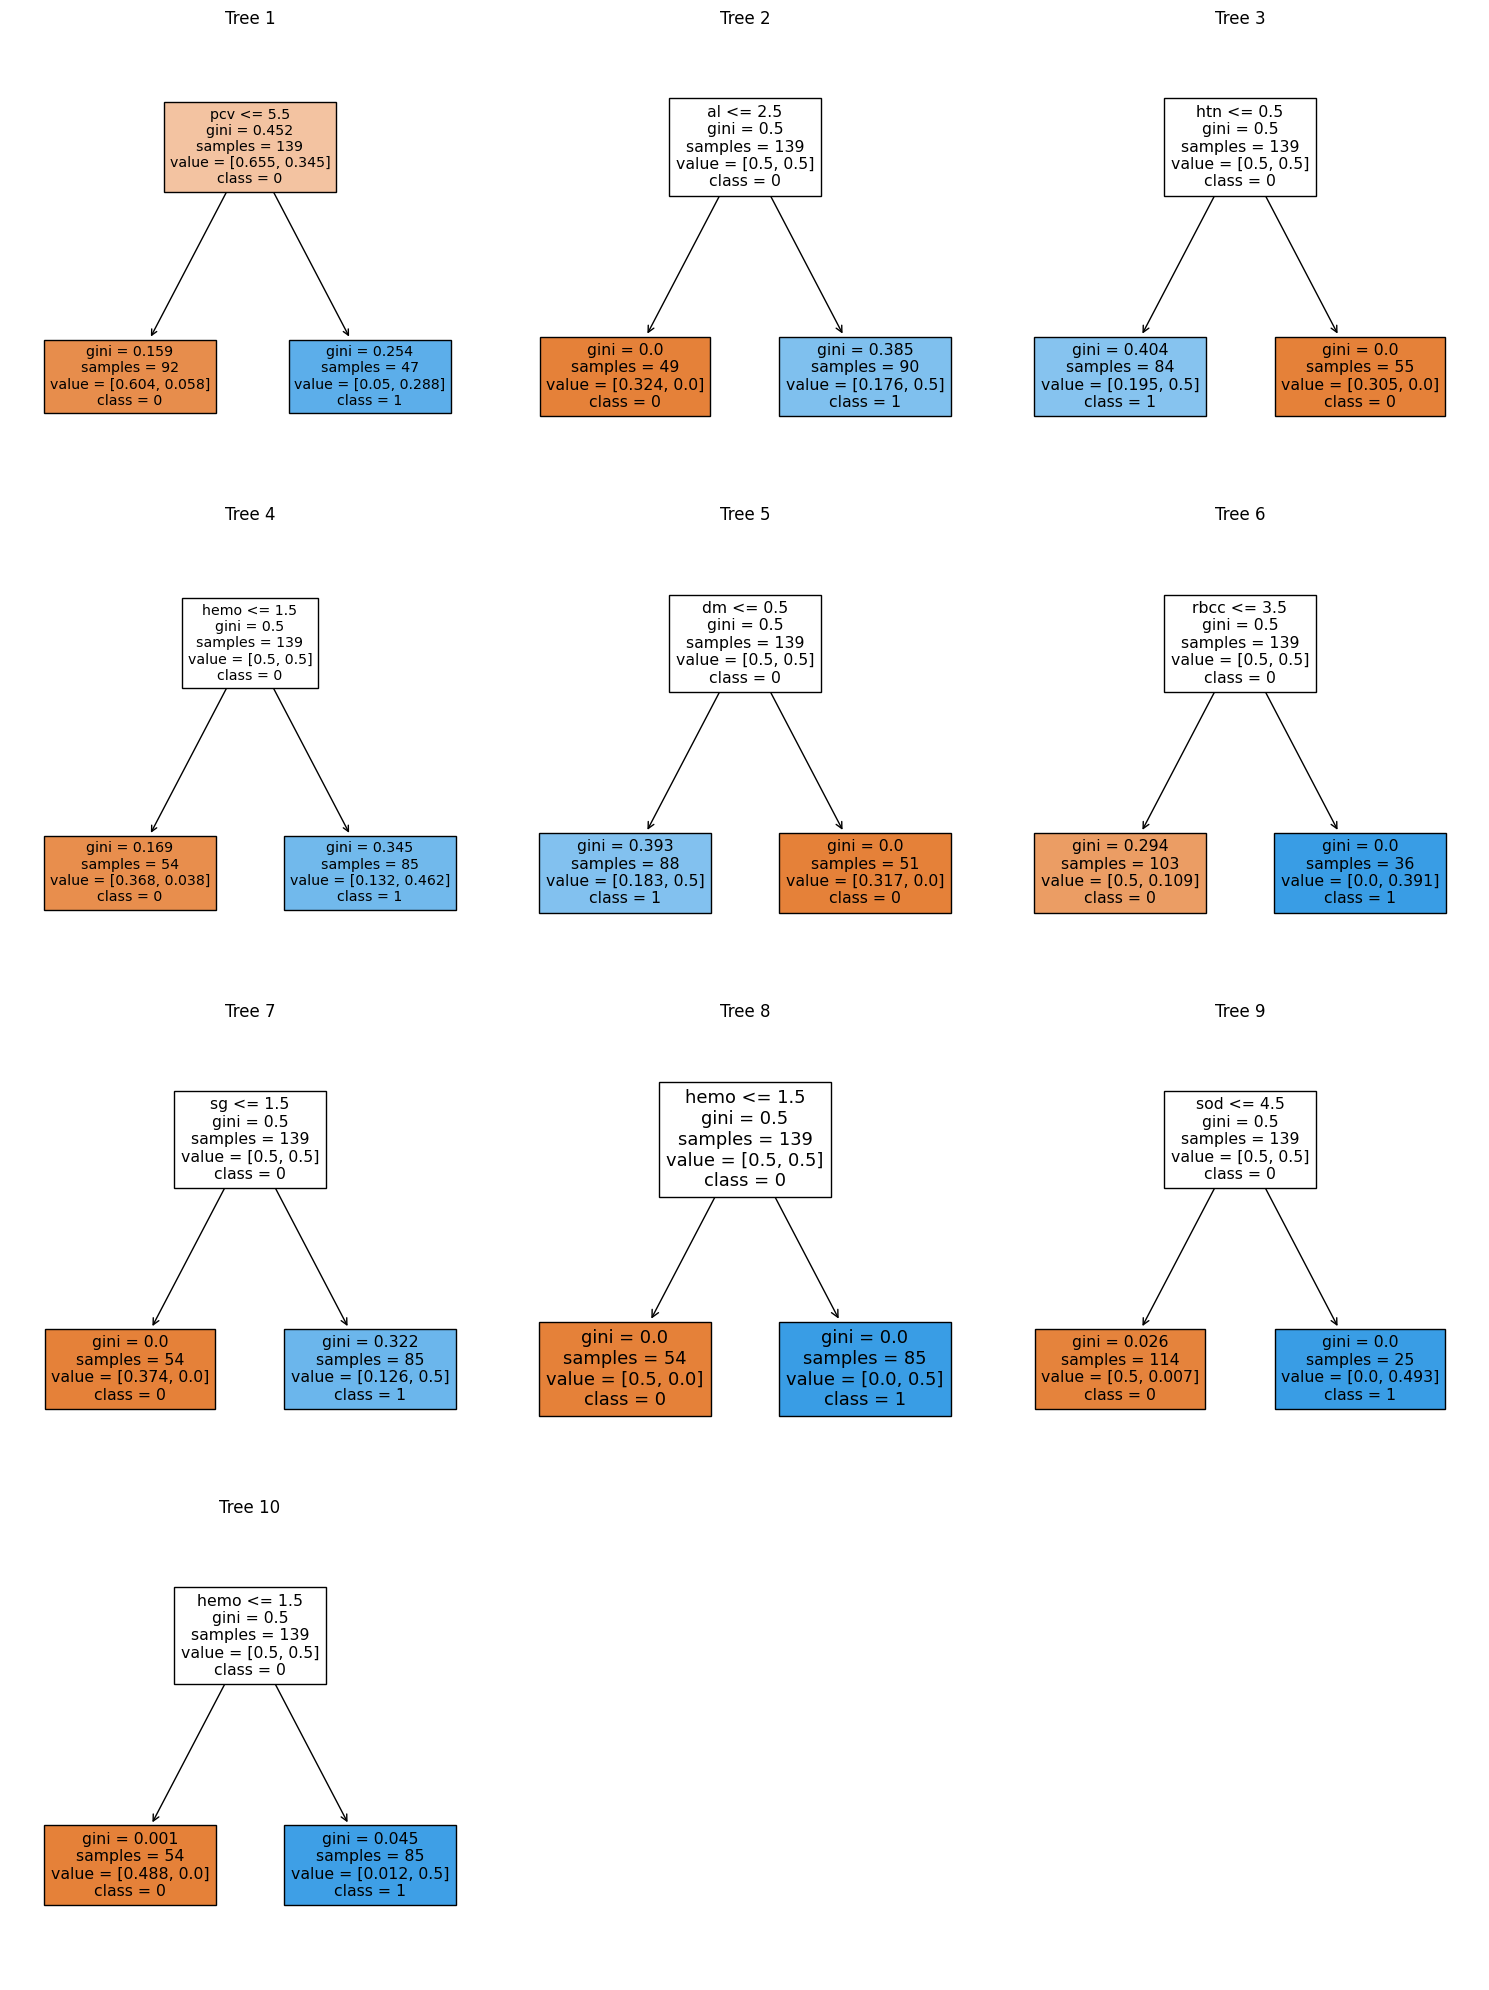

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
num_trees = min(10, len(abc.estimators_))
num_rows = num_trees // 3
if num_trees % 3 != 0:
    num_rows += 1
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, num_rows*5))
axes = axes.flatten()
for i in range(num_trees):
    ax = axes[i]
    plot_tree(abc.estimators_[i], filled=True, feature_names=X_train.columns, class_names=['0', '1'], ax=ax)
    ax.set_title(f'Tree {i+1}')
    ax.axis('off')
for i in range(num_trees, num_rows*3):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()



SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm = SVC()
svm.fit(X_train, y_train)
svm_acc = accuracy_score(y_test, svm.predict(X_test))
svm_acc_percentage = svm_acc * 100
train_accuracy_svm = accuracy_score(y_train, svm.predict(X_train))
print(f"Training Accuracy of SVM Classifier is {train_accuracy_svm * 100:.2f}%")
print(f"Test Accuracy of SVM Classifier is {svm_acc_percentage:.2f}% \n")

Training Accuracy of SVM Classifier is 99.28%
Test Accuracy of SVM Classifier is 98.33% 



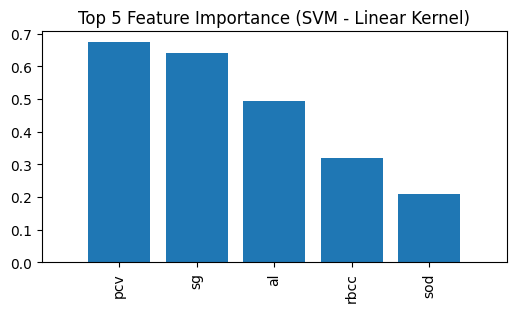

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
importances = svm.coef_[0]
feature_names = X_train.columns
indices = importances.argsort()[::-1]
plt.figure(figsize=(6,3))
plt.title("Top 5 Feature Importance (SVM - Linear Kernel)")
plt.bar(range(5), importances[indices[:5]], align="center")
plt.xticks(range(5), [feature_names[i] for i in indices[:5]], rotation='vertical')
plt.xlim([-1, 5])
plt.show()



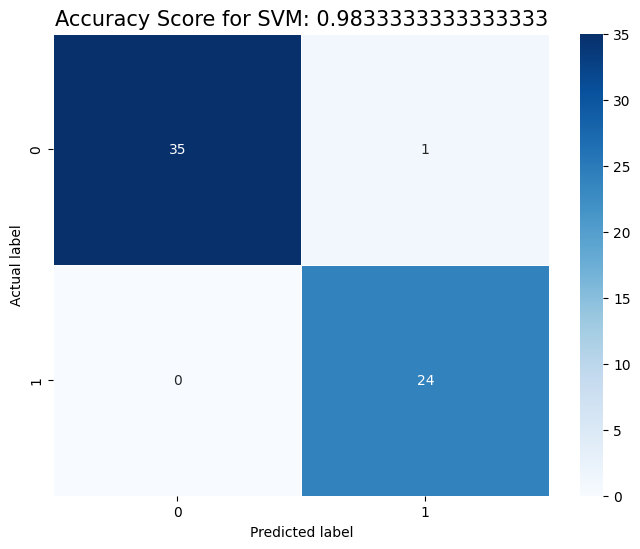

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred_svm = svm.predict(X_test)
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(data=cm_svm, linewidths=.5, annot=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for SVM: {0}'.format(svm.score(X_test, y_test))
plt.title(all_sample_title, size=15)
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
from tabulate import tabulate
accuracy_svm = round(accuracy_score(y_test, y_pred_svm) * 100, 2)
f1_svm = f1_score(y_test, y_pred_svm, average='micro')
precision_svm = precision_score(y_test, y_pred_svm, average='micro')
recall_svm = recall_score(y_test, y_pred_svm, average='micro')
jaccard_svm = jaccard_score(y_test, y_pred_svm, average='micro')
logloss_svm = log_loss(y_test, y_pred_svm)
data_svm = {'Metric': ['Accuracy', 'F1 Score', 'Precision', 'Recall', 'Jaccard Score', 'Log Loss'],
            'Value': [accuracy_svm, f1_svm, precision_svm, recall_svm, jaccard_svm, logloss_svm]}
df_svm = pd.DataFrame(data_svm)
print(tabulate(df_svm, headers='keys', tablefmt='grid'))


+----+---------------+-----------+
|    | Metric        |     Value |
+====+===============+===========+
|  0 | Accuracy      | 98.33     |
+----+---------------+-----------+
|  1 | F1 Score      |  0.983333 |
+----+---------------+-----------+
|  2 | Precision     |  0.983333 |
+----+---------------+-----------+
|  3 | Recall        |  0.983333 |
+----+---------------+-----------+
|  4 | Jaccard Score |  0.967213 |
+----+---------------+-----------+
|  5 | Log Loss      |  0.600728 |
+----+---------------+-----------+


In [ ]:
df.shape

(200, 28)

In [ ]:
from tabulate import tabulate
data = [
    ["Decision Tree", dtc_acc],
    ["Random Forest", rfc_acc],
    ["AdaBoost", adaboost_acc],
    ["SVM",svm_acc],

]

headers = ["Model", "Accuracy"]
data_sorted = sorted(data, key=lambda x: x[1])
print(tabulate(data_sorted, headers, tablefmt="pretty"))



+---------------+--------------------+
|     Model     |      Accuracy      |
+---------------+--------------------+
| Decision Tree | 0.9666666666666667 |
|      SVM      | 0.9833333333333333 |
| Random Forest |        1.0         |
|   AdaBoost    |        1.0         |
+---------------+--------------------+


In [ ]:

dtc_feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance (Decision Tree)': dtc.feature_importances_})
rfc_feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance (Random Forest)': rfc.feature_importances_})
adaboost_feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance (AdaBoost)': adaboost.feature_importances_})
merged_feature_importance_df = dtc_feature_importance_df.merge(rfc_feature_importance_df, on='Feature')

merged_feature_importance_df = merged_feature_importance_df.merge(adaboost_feature_importance_df, on='Feature')
merged_feature_importance_df['Mean Importance'] = merged_feature_importance_df.mean(axis=1)
merged_feature_importance_df = merged_feature_importance_df.sort_values(by='Mean Importance', ascending=False)
top_n = 5
top_features = merged_feature_importance_df.head(top_n)

print("Top", top_n, "Features Contributing to Attrition (Average Importance from All Models):")
print(top_features[['Feature', 'Mean Importance']])



Top 5 Features Contributing to Attrition (Average Importance from All Models):
   Feature  Mean Importance
15     pcv         0.286687
16    rbcc         0.105235
14    hemo         0.098689
3       al         0.090902
2       sg         0.078843


<ipython-input-64-07a7d6fe2dbb>:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  merged_feature_importance_df['Mean Importance'] = merged_feature_importance_df.mean(axis=1)


In [ ]:
import pandas as pd
from tabulate import tabulate
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss

models = ["Decision Tree", "Random Forest", "SVM", "AdaBoost"]

metrics = ["Accuracy", "F1 Score", "Precision", "Recall", "Jaccard Score", "Log Loss"]

accuracy_scores = []
f1_scores = []
precision_scores = []
recall_scores = []
jaccard_scores = []
logloss_scores = []

y_preds = [y_pred, y_pred_rfc, y_pred_svm, y_pred_adaboost]

for y_pre in y_preds:
    accuracy = round(accuracy_score(y_test, y_pre) * 100, 2)
    f1 = f1_score(y_test, y_pre, average='micro')
    precision = precision_score(y_test, y_pre, average='micro')
    recall = recall_score(y_test, y_pre, average='micro')
    jaccard = jaccard_score(y_test, y_pre, average='micro')
    logloss = log_loss(y_test, y_pre)

    accuracy_scores.append(accuracy)
    f1_scores.append(f1)
    precision_scores.append(precision)
    recall_scores.append(recall)
    jaccard_scores.append(jaccard)
    logloss_scores.append(logloss)

data = {
    'Model': models,
    'Accuracy': accuracy_scores,
    'F1 Score': f1_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'Jaccard Score': jaccard_scores,
    'Log Loss': logloss_scores
}

result_df = pd.DataFrame(data)
print(tabulate(result_df, headers='keys', tablefmt='grid'))
best_model = result_df[result_df['Accuracy'] == result_df['Accuracy'].max()]['Model'].values[0]
print(f"\nBest Model based on Accuracy: {best_model}")


+----+---------------+------------+------------+-------------+----------+-----------------+-------------+
|    | Model         |   Accuracy |   F1 Score |   Precision |   Recall |   Jaccard Score |    Log Loss |
+====+===============+============+============+=============+==========+=================+=============+
|  0 | Decision Tree |      96.67 |   0.966667 |    0.966667 | 0.966667 |        0.935484 | 1.20146     |
+----+---------------+------------+------------+-------------+----------+-----------------+-------------+
|  1 | Random Forest |     100    |   1        |    1        | 1        |        1        | 2.22045e-16 |
+----+---------------+------------+------------+-------------+----------+-----------------+-------------+
|  2 | SVM           |      98.33 |   0.983333 |    0.983333 | 0.983333 |        0.967213 | 0.600728    |
+----+---------------+------------+------------+-------------+----------+-----------------+-------------+
|  3 | AdaBoost      |     100    |   1       